## EDA_Project: 호텔 예약 취소 요인 분석

## Contents
    1. 데이터 소개
    2. 데이터 전처리
    3. 가설 검증
    4. 예측 모델 비교

### 1. 데이터 소개
- 소개: 포르투갈의 city와 resort 호텔의 2015.07.~2017.08. 기간 중 고객들의 예약 정보로, 호텔 데이터베이스에서 추출한 데이터이며 데이터 개수는 약 12만개임
- 주제: 호텔 예약 취소에 영향을 미치는 요인이 무엇인지 분석하고자 함
- 데이터 정의
    - lead_time: (호텔 도착일자) - (호텔 예약 일자)로, lead_time이 높을수록 미리 호텔을 예약한 것임
    - ADR : 숙박비를 머문 기간으로 나눈 것
    - Deposit : no deposit, non-refundable, refundable
    - booking_changes: 숙박일수, 예약날짜, 룸 타입 등 예약 변경한 건수
    - speical_request: 베드 추가, 오션뷰, 고층 요청 등 고객의 객실과 관련된 추가 요청사항 건수

In [114]:
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

In [63]:
hotel_df = pd.read_csv("hotel_bookings.csv")

In [64]:
hotel_df.head(5) #원본데이터

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

### 2. 데이터 전처리
        - 불필요한 데이터 삭제
            - Distribution_channel, agent, company, required_car_parking_spaces column 삭제
        - 결측치 및 이상 데이터 처리
            - children n/a 값 0으로 대체
            - audlt=0 & children=0 & babies=0 데이터 삭제
            - 국가 null -> 빈도수가 가장 많은 PRT로 대체
        - 기타
            - children 데이터 타입(float -> int) 변경
            - 월(month) 문자열(July)을 숫자(7)로 변경
            - year, month, date column 병합

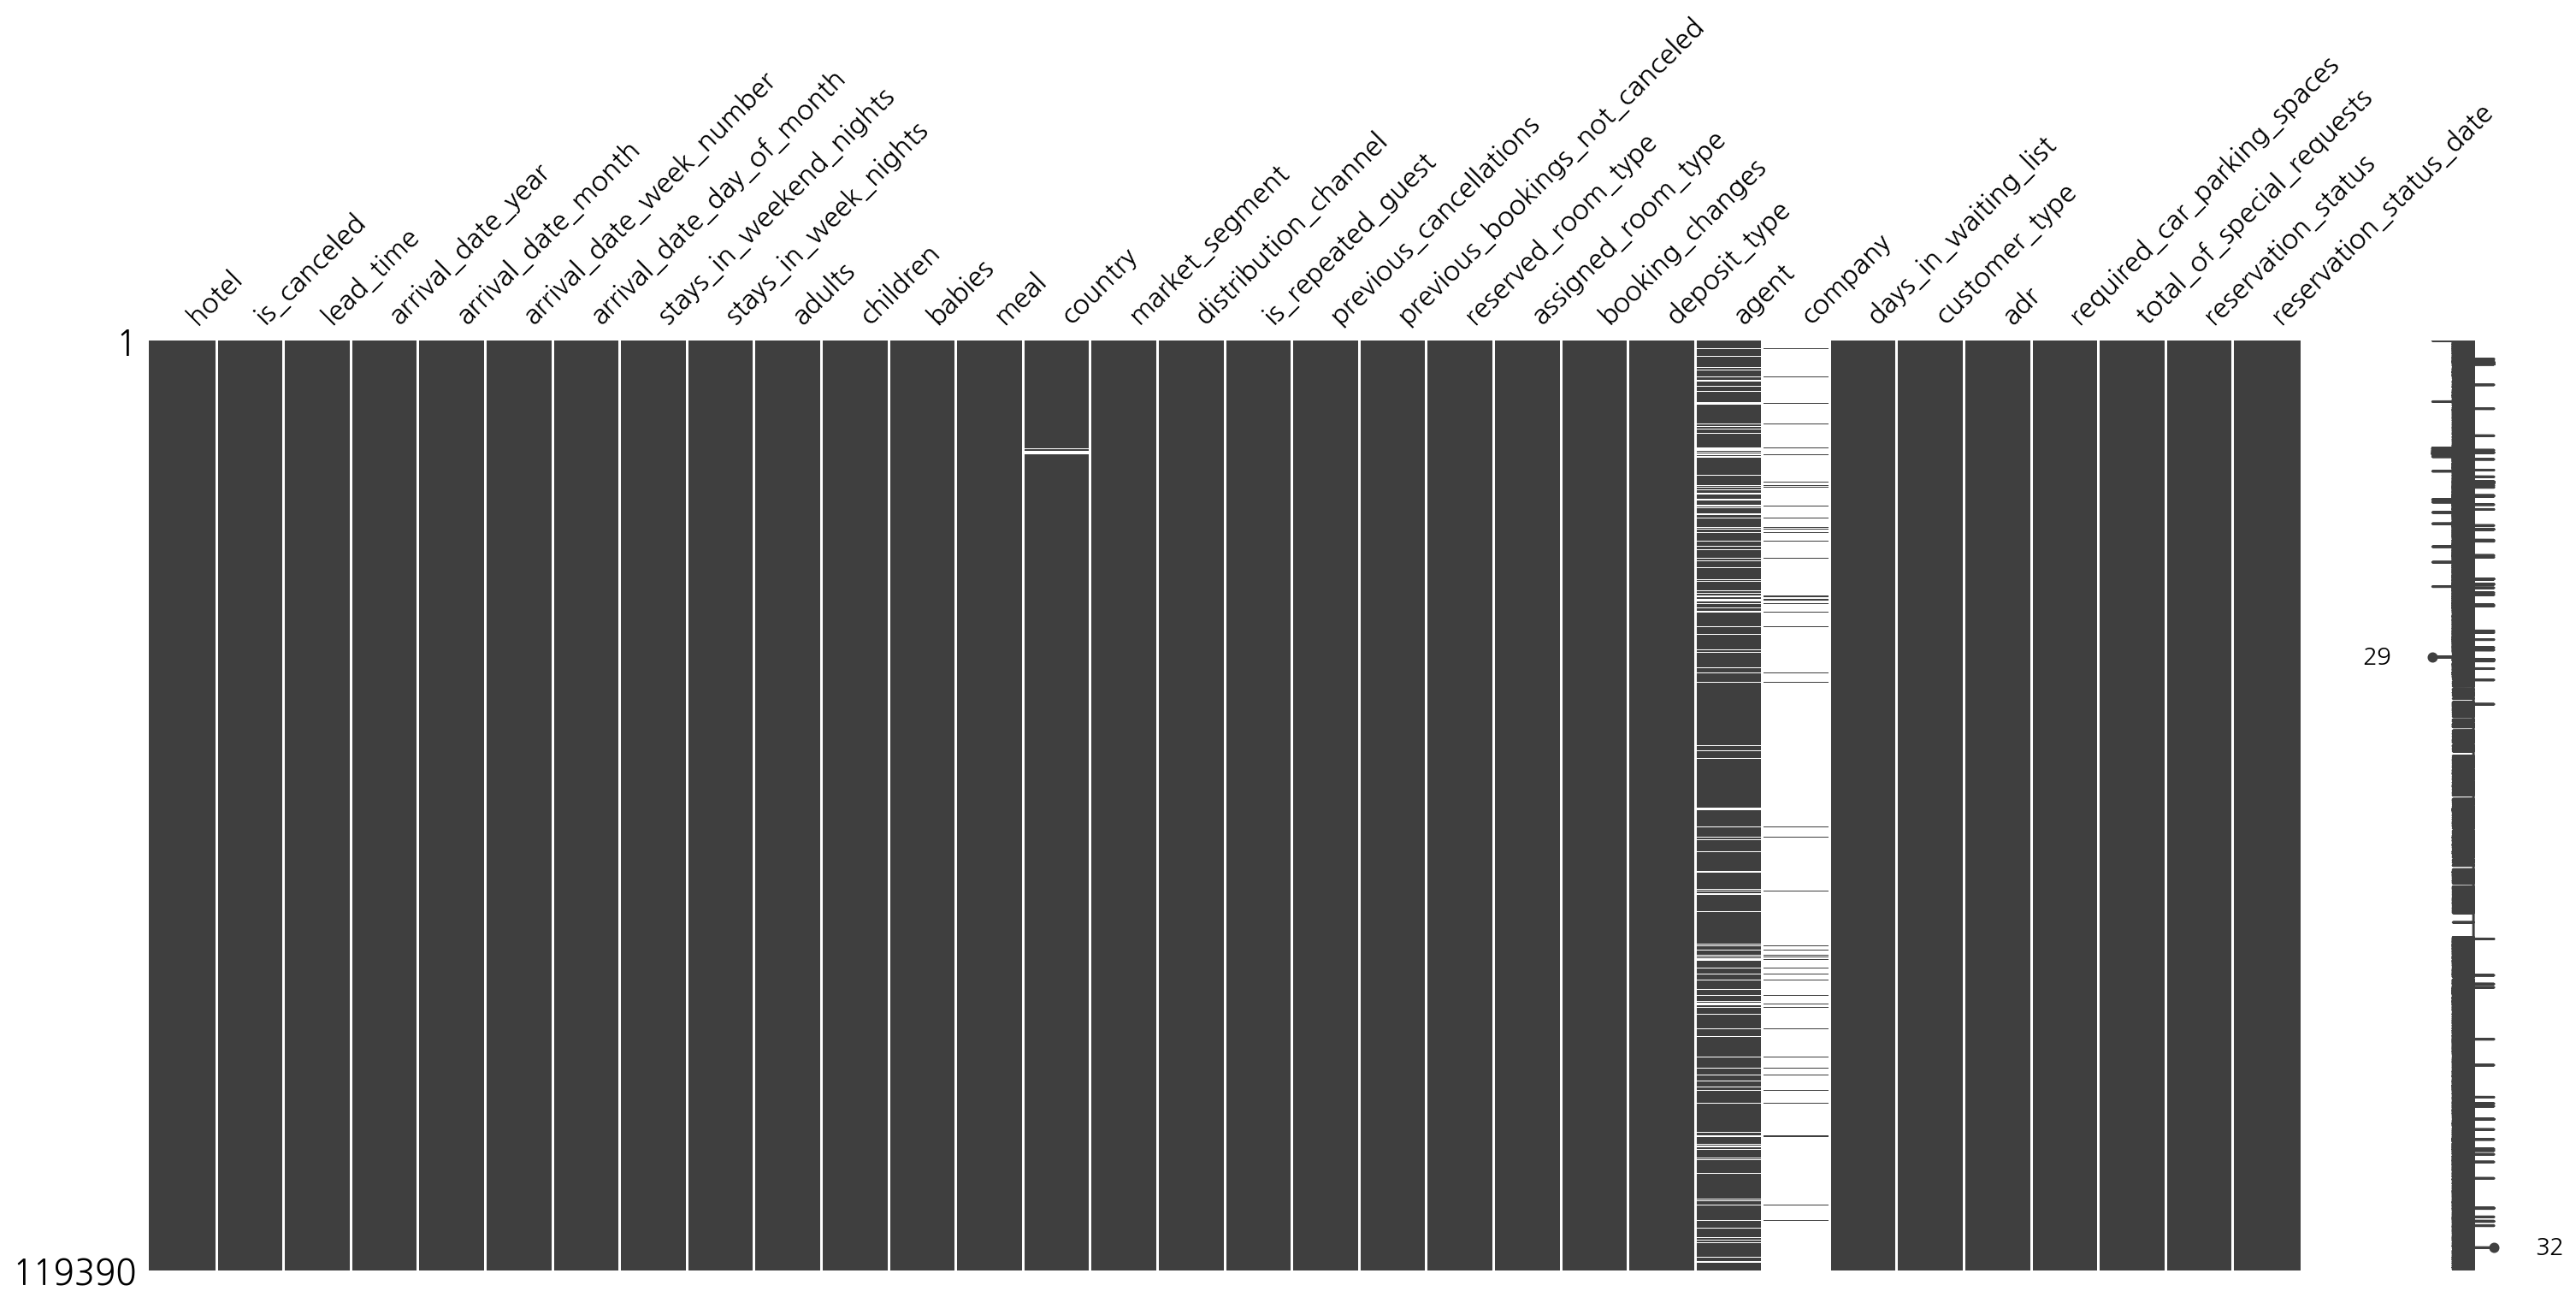

In [65]:
import missingno as msno
msno.matrix(hotel_df)

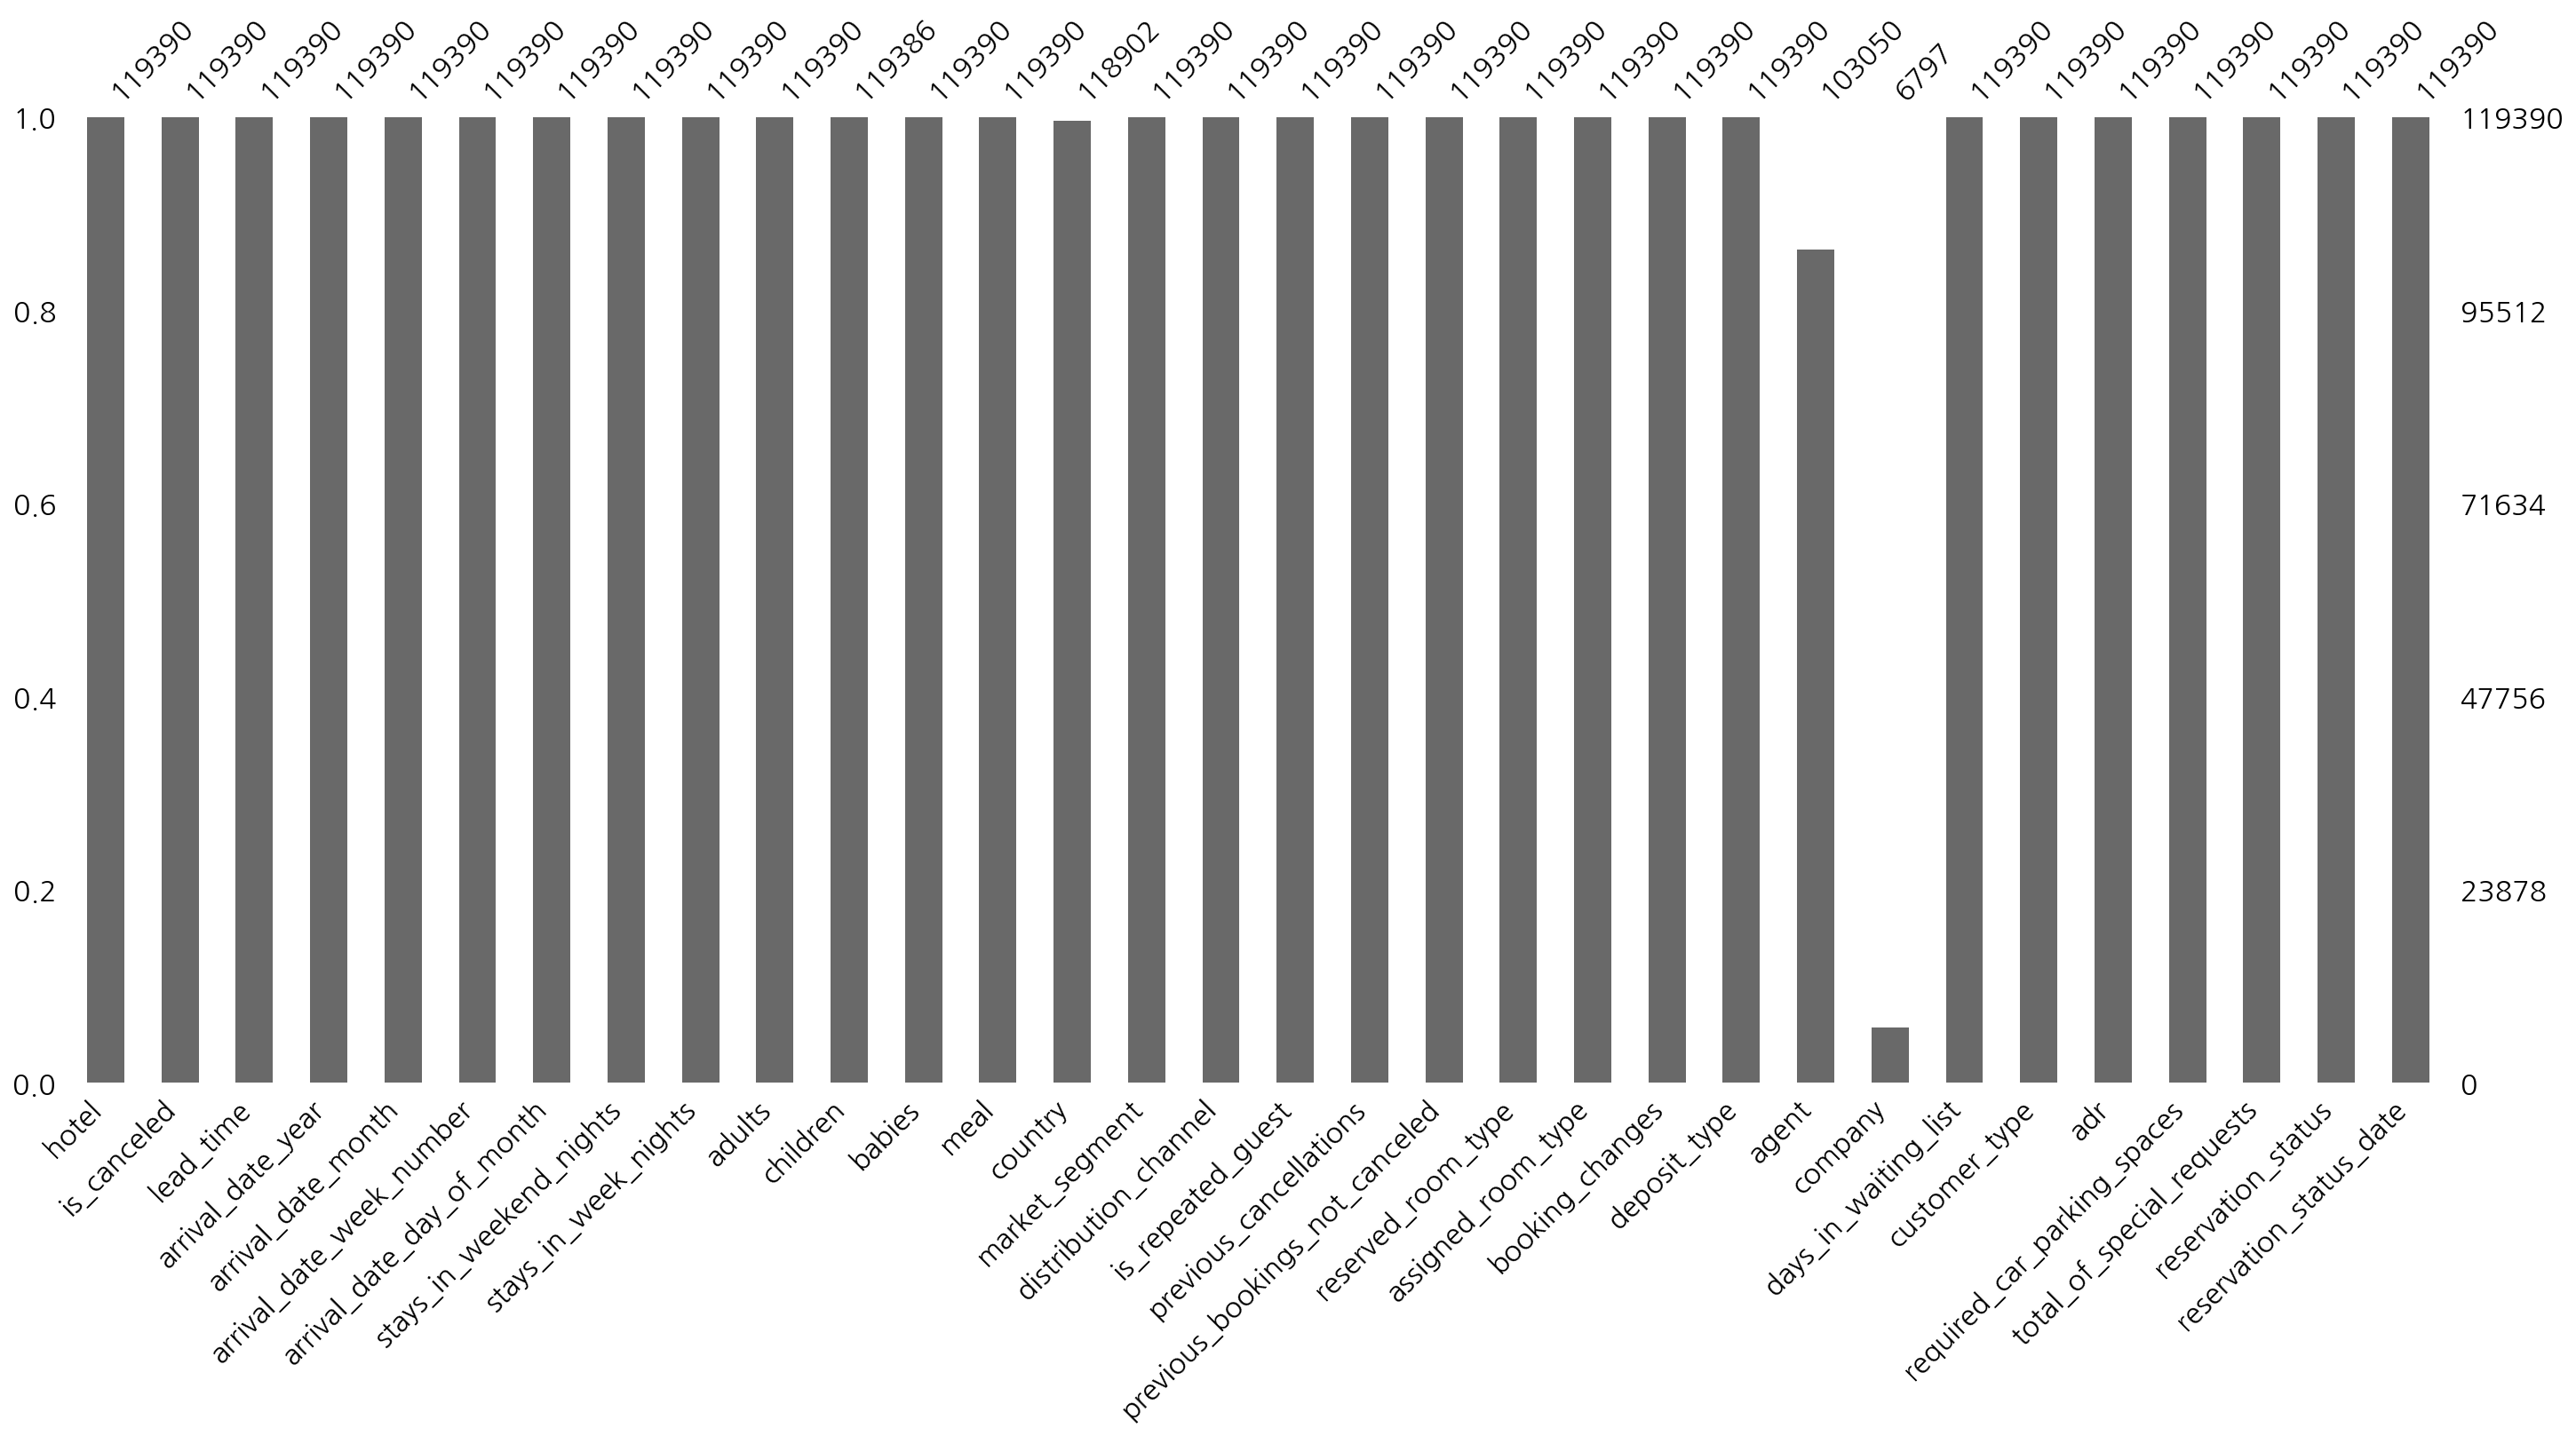

In [66]:
msno.bar(hotel_df)

In [67]:
df2 = pd.DataFrame(hotel_df)  #df2로 데이터프레임 생성

In [68]:
df2

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  deposit_type  agent company  \
0                          0       2  ...    No Deposit    NaN     NaN   
1                          0       2  ...    No Deposit    NaN     NaN   
2                          1       1  ...    No Deposit    NaN     NaN   
3                          1       1  ...    No Deposit  304.0     NaN   
4                          2       2  ...    No Deposit  240.0     NaN   
...                      ...     ...  ...           ...    ...     ...   
119385                     5       2  ...    No Deposit  394.0     NaN   
119386                     5       3  ...    No Deposit    9.0     NaN   
119387                     5       2  ...    No Deposit    9.0     NaN   
119388                     5       2  ...    No Deposit   89.0     NaN   
119389                     7       2  ...    No Deposit    9.0     NaN   

       days_in_waiting_list customer_type     adr  \
0                         0     Transient    0.00   
1                         0     Transient    0.00   
2                         0     Transient   75.00   
3                         0     Transient   75.00   
4                         0     Transient   98.00   
...                     ...           ...     ...   
119385                    0     Transient   96.14   
119386                    0     Transient  225.43   
119387                    0     Transient  157.71   
119388                    0     Transient  104.40   
119389                    0     Transient  151.20   

        required_car_parking_spaces  total_of_special_requests  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3             

In [69]:
df2.drop(["distribution_channel"], axis='columns', inplace=True) #distribution_channel 컬럼 삭제

In [70]:
df2.drop(["agent"], axis='columns', inplace=True) #agent컬럼 삭제

In [71]:
df2.drop(["company"], axis='columns', inplace=True) #company컬럼 삭제

In [72]:
df2.drop(["required_car_parking_spaces"], axis='columns', inplace=True) #parking 컬럼삭제

In [73]:
df2

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  reserved_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   A   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119387                     5       2  ...                   D   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                        C               3   No Deposit                    0   
1                        C               4   No Deposit                    0   
2                        C               0   No Deposit                    0   
3                        A               0   No Deposit                    0   
4                        A               0   No Deposit                    0   
...                    ...             ...          ...                  ...   
119385                   A               0   No Deposit                    0   
119386                   E               0   No Deposit                    0   
119387                   D               0   No Deposit                    0   
119388                   A               0   No Deposit                    0   
119389                   A               0   No Deposit                    0   

        customer_type     adr  total_of_special_requests reser

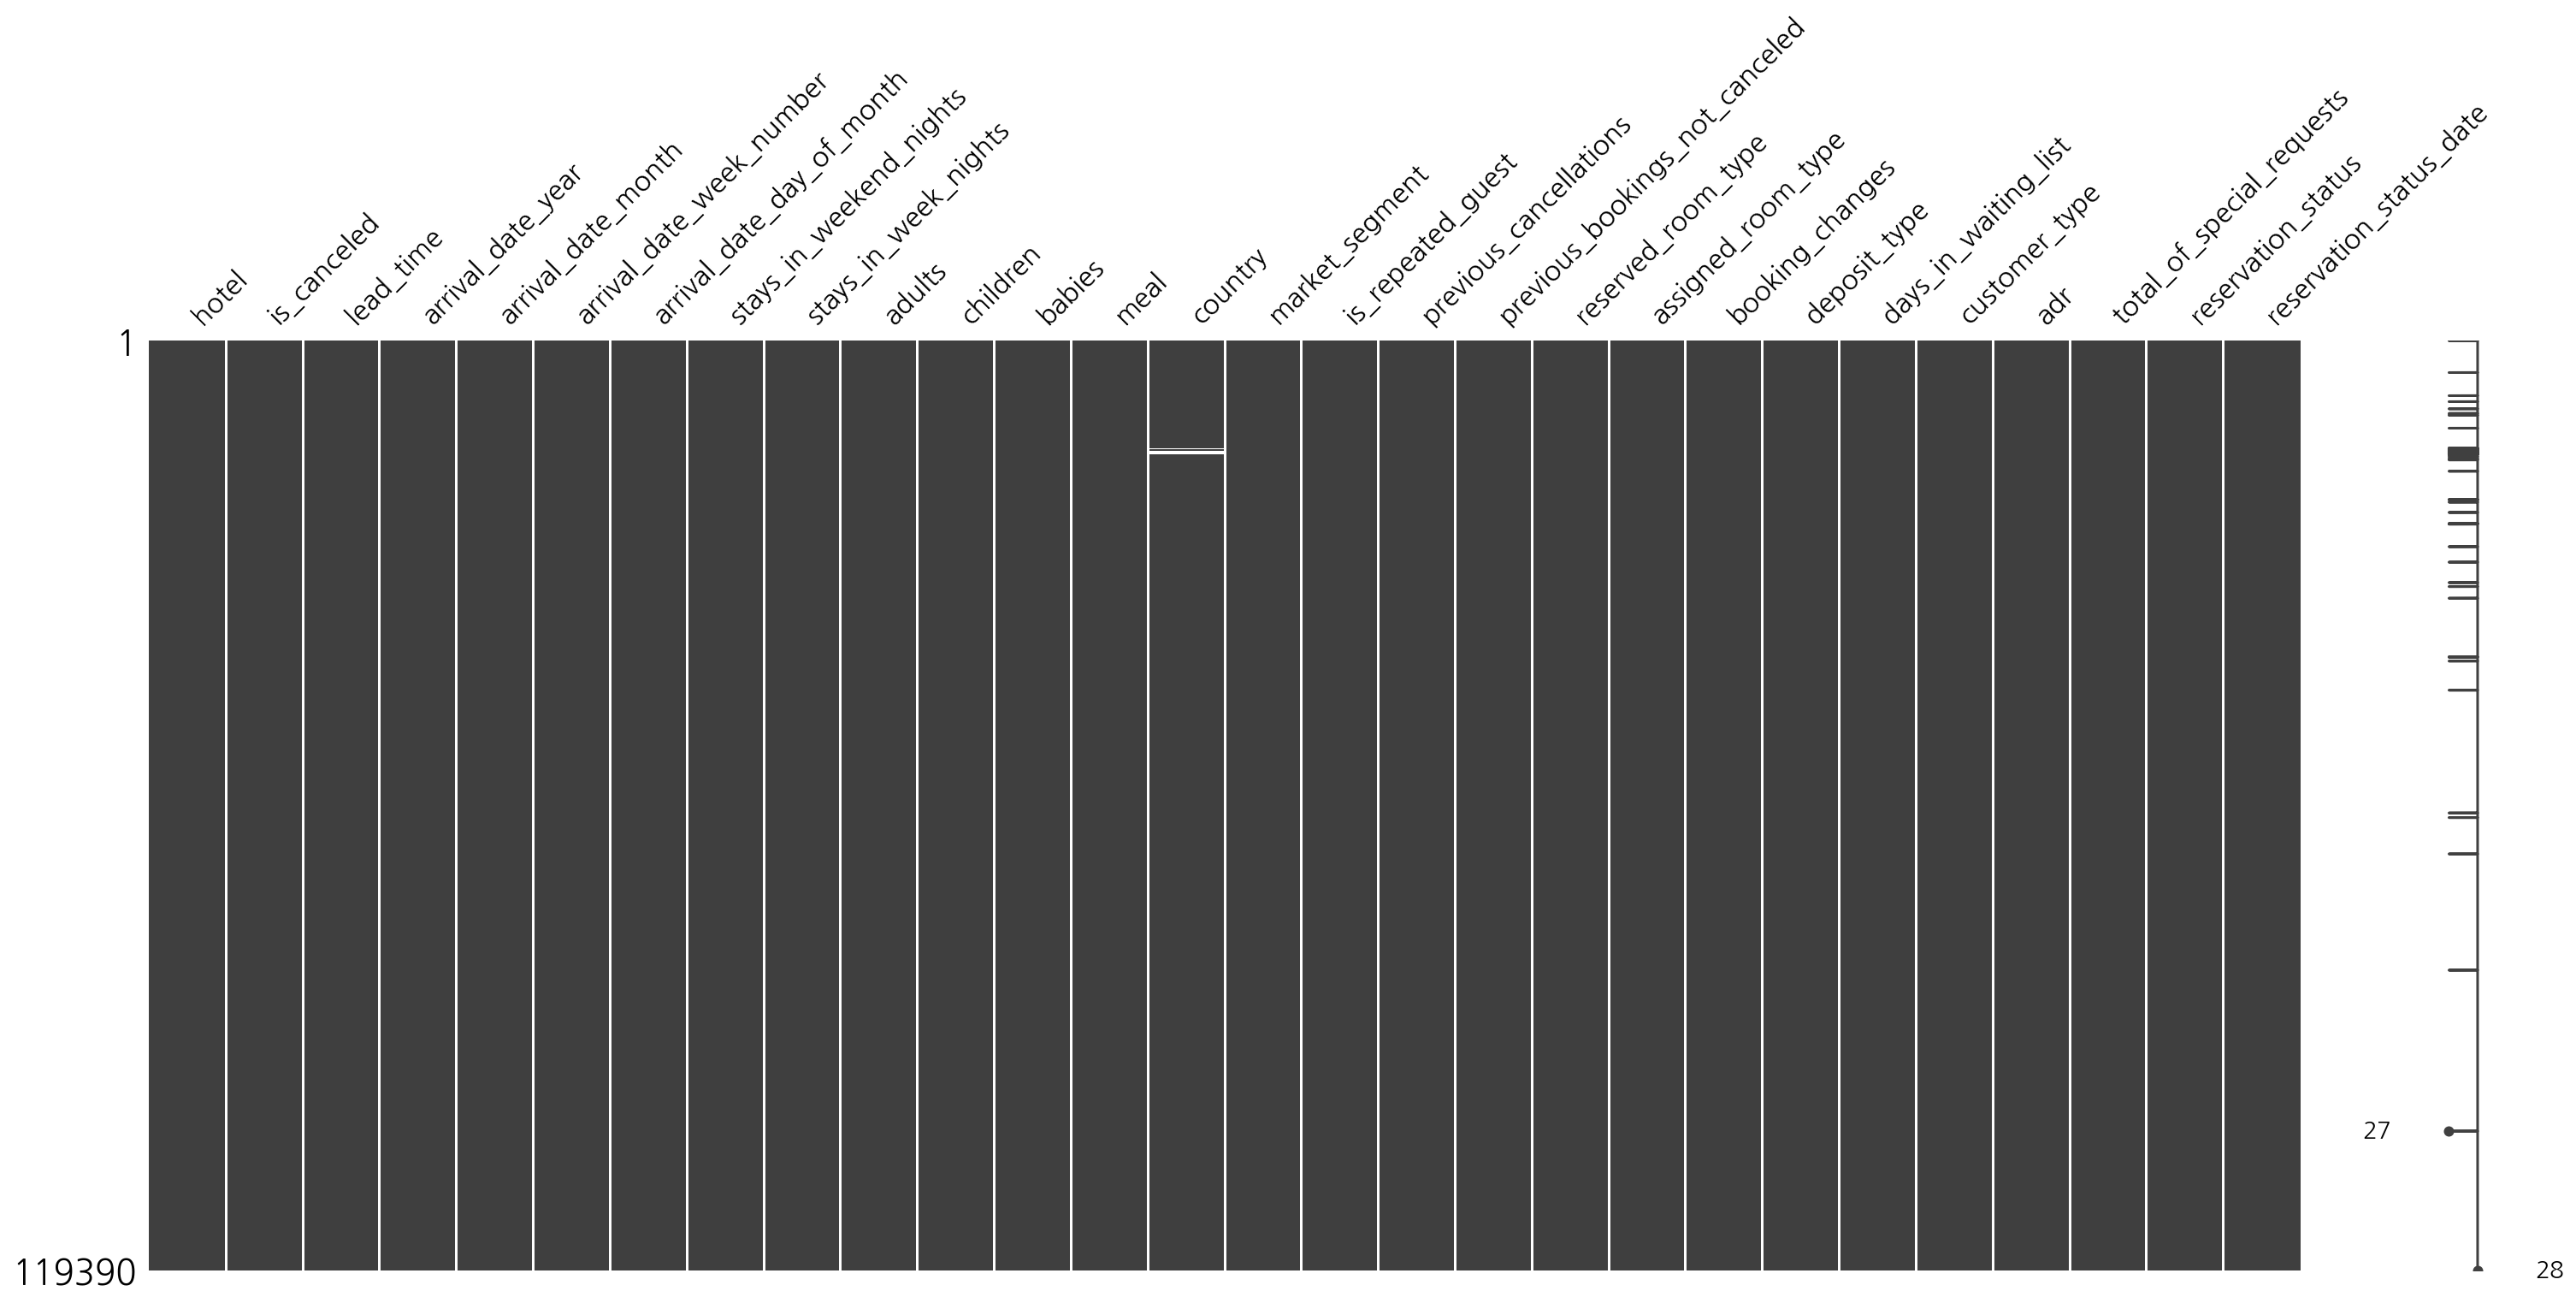

In [74]:
import missingno as msno
msno.matrix(df2)

In [75]:
len(df2[df2["children"].isnull()]) #children열의 na갯수

4

In [76]:
df2["children"].fillna(0, inplace=True)  #children열의 na 값 0으로 대체

In [77]:
len(df2[df2["children"].isnull()]) #children열의 na값이 0개로 확인

0

In [78]:
# children 데이터 타입 변경(float -> int)
df2["children"].dtypes

dtype('float64')

In [79]:
df2 = df2.astype({"children":'int'})

In [80]:
df2["children"].dtypes

dtype('int32')

In [81]:
# adult, children, baby =0 인 데이터 삭제
len(df2[(df2["children"]==0) & (df2["adults"]==0) & (df2["babies"]==0)])

180

In [82]:
df2.drop(df2[(df2["children"]==0) & (df2["adults"]==0) & (df2["babies"]==0)].index, inplace=True)

In [83]:
len(df2[(df2["children"]==0) & (df2["adults"]==0) & (df2["babies"]==0)])

0

In [84]:
len(df2[df2["country"].isnull()]) #country열의 na갯수

478

In [85]:
len(df2[(df2["country"]=="PRT")])

48483

In [86]:
df2["country"].fillna("PRT", inplace=True)  #country열의 na 값 PRT으로 대체(빈도수 가장 많음)

In [87]:
len(df2[df2["country"].isnull()])

0

In [88]:
df2["arrival_date_month"] 

0           July
1           July
2           July
3           July
4           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 119210, dtype: object

In [89]:
print(df2['arrival_date_month'].unique())

['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']


In [90]:
print(df2['arrival_date_month'].dtype)

object


In [91]:
# 월을 숫자로 변환
df2['arrival_date_month'].replace({'January':1,'February':2,'March':3,
                                   'April':4, 'May':5, 'June':6, 
                                   'July':7, 'August':8, 'September':9,
                                   'October':10, 'November':11, 'December':12}, inplace=True)

In [92]:
print(df2['arrival_date_month'].unique())

[ 7  8  9 10 11 12  1  2  3  4  5  6]


In [93]:
df2

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
0                        7                        27   
1                        7                        27   
2                        7                        27   
3                        7                        27   
4                        7                        27   
...                    ...                       ...   
119385                   8                        35   
119386                   8                        35   
119387                   8                        35   
119388                   8                        35   
119389                   8                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  reserved_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   A   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119387                     5       2  ...                   D   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        assigned_room_type booking_changes deposit_type days_in_waiting_list  \
0                        C               3   No Deposit                    0   
1                        C               4   No Deposit                    0   
2                        C               0   No Deposit                    0   
3                        A               0   No Deposit                    0   
4                        A               0   No Deposit                    0   
...                    ...             ...          ...                  ...   
119385                   A               0   No Deposit                    0   
119386                   E               0   No Deposit                    0   
119387                   D               0   No Deposit                    0   
119388                   A               0   No Deposit                    0   
119389                   A               0   No Deposit                    0   

        customer_type     adr  total_of_special_re

In [94]:
# 연월일 합쳐서 컬럼추가
df2["y_m_d"]=pd.to_datetime(df2.arrival_date_year.astype(str)+'-' +df2.arrival_date_month.astype(str)+'-'+df2.arrival_date_day_of_month.astype(str) )
df2

hotel  is_canceled  lead_time  arrival_date_year  \
0       Resort Hotel            0        342               2015   
1       Resort Hotel            0        737               2015   
2       Resort Hotel            0          7               2015   
3       Resort Hotel            0         13               2015   
4       Resort Hotel            0         14               2015   
...              ...          ...        ...                ...   
119385    City Hotel            0         23               2017   
119386    City Hotel            0        102               2017   
119387    City Hotel            0         34               2017   
119388    City Hotel            0        109               2017   
119389    City Hotel            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
0                        7                        27   
1                        7                        27   
2                        7                        27   
3                        7                        27   
4                        7                        27   
...                    ...                       ...   
119385                   8                        35   
119386                   8                        35   
119387                   8                        35   
119388                   8                        35   
119389                   8                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         30                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
0                          0       2  ...                   C   
1                          0       2  ...                   C   
2                          1       1  ...                   C   
3                          1       1  ...                   A   
4                          2       2  ...                   A   
...                      ...     ...  ...                 ...   
119385                     5       2  ...                   A   
119386                     5       3  ...                   E   
119387                     5       2  ...                   D   
119388                     5       2  ...                   A   
119389                     7       2  ...                   A   

        booking_changes deposit_type days_in_waiting_list customer_type  \
0                     3   No Deposit                    0     Transient   
1                     4   No Deposit                    0     Transient   
2                     0   No Deposit                    0     Transient   
3                     0   No Deposit                    0     Transient   
4                     0   No Deposit                    0     Transient   
...                 ...          ...                  ...           ...   
119385                0   No Deposit                    0     Transient   
119386                0   No Deposit                    0     Transient   
119387                0   No Deposit                    0     Transient   
119388                0   No Deposit                    0     Transient   
119389                0   No Deposit                    0     Transient   

           adr  total_of_special_requests  reservation_status  \
0         0.00                          0    

In [95]:
df2.to_csv("hotel_eda2.csv",mode='w', header=True, index=False)

### 3. 가설 검증
    1) lead_time이 높을수록 호텔 취소율이 높을 것이다.
    2) 예치금 환불이 안되면 호텔 취소율이 낮을 것이다.
    3) 예약 변경 건수가 많을수록 호텔 취소율이 낮을 것이다.
    4) 고객의 특별 요청건수가 많을수록 호텔 취소율이 낮을 것이다.
    5) 아이와 함께온 고객이 취소율이 낮을 것이다.
    6) 재방문 고객이면 호텔 취소율이 낮을 것이다.
    7) 호텔 가격이 비싸면 취소율이 낮을 것이다.
    8) 성수기에 취소율이 낮을 것이다.
    9) 포르투갈 고객의 취소율이 높을 것이다.

In [96]:
df = pd.read_csv("hotel_eda2.csv" )

In [97]:
df.tail(2)

hotel  is_canceled  lead_time  arrival_date_year  \
119208  City Hotel            0        109               2017   
119209  City Hotel            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
119208                   8                        35   
119209                   8                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119208                         31                        2   
119209                         29                        2   

        stays_in_week_nights  adults  ...  assigned_room_type  \
119208                     5       2  ...                   A   
119209                     7       2  ...                   A   

        booking_changes deposit_type days_in_waiting_list customer_type  \
119208                0   No Deposit                    0     Transient   
119209                0   No Deposit                    0     Transient   

          adr  total_of_special_requests  reservation_status  \
119208  104.4                          0           Check-Out   
119209  151.2                          2           Check-Out   

       reservation_status_date       y_m_d  
119208              2017-09-07  2017-08-31  
119209              2017-09-07  2017-08-29  

[2 rows x 29 columns]

In [98]:
import matplotlib.pyplot as mpl

In [99]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

In [100]:
df = pd.read_csv("hotel_eda2.csv")

#### 3.1 데이터 OVERVIEW - 상관분석

In [101]:
# 호텔 취소율
len(df["is_canceled"]), len(df[(df["is_canceled"]==1)]), len(df[(df["is_canceled"]==1)]) / len(df["is_canceled"]) * 100

(119210, 44199, 37.0765875346028)

In [102]:
data1 = pd.get_dummies(df["hotel"])
data2 = pd.get_dummies(df["market_segment"])
data3 = pd.get_dummies(df["deposit_type"])
data4 = pd.get_dummies(df["customer_type"])
data5 = pd.get_dummies(df["country"])
data6 = pd.get_dummies(df["meal"])
data7 = pd.get_dummies(df["reserved_room_type"])
data8 = pd.get_dummies(df["assigned_room_type"])

df2 = pd.concat([df, data1, data2, data3, data4, data5, data6, data7, data8], axis=1)
df2.tail(2)

hotel  is_canceled  lead_time  arrival_date_year  \
119208  City Hotel            0        109               2017   
119209  City Hotel            0        205               2017   

        arrival_date_month  arrival_date_week_number  \
119208                   8                        35   
119209                   8                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
119208                         31                        2   
119209                         29                        2   

        stays_in_week_nights  adults  ...  B  C  D  E  F  G  H  I  K  L  
119208                     5       2  ...  0  0  0  0  0  0  0  0  0  0  
119209                     7       2  ...  0  0  0  0  0  0  0  0  0  0  

[2 rows x 248 columns]

In [103]:
df2.drop(["hotel"], axis='columns', inplace=True)
df2.drop(["market_segment"], axis='columns', inplace=True)
df2.drop(["deposit_type"], axis='columns', inplace=True)
df2.drop(["customer_type"], axis='columns', inplace=True)
df2.drop(["meal"], axis='columns', inplace=True)
df2.drop(["country"], axis='columns', inplace=True)
df2.drop(["reserved_room_type"], axis='columns', inplace=True)
df2.drop(["assigned_room_type"], axis='columns', inplace=True)
df2.drop(["reservation_status_date"], axis='columns', inplace=True)
df2.drop(["y_m_d"], axis='columns', inplace=True)
df2.drop(["reservation_status"], axis='columns', inplace=True)
df2.tail(2)

is_canceled  lead_time  arrival_date_year  arrival_date_month  \
119208            0        109               2017                   8   
119209            0        205               2017                   8   

        arrival_date_week_number  arrival_date_day_of_month  \
119208                        35                         31   
119209                        35                         29   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  ...  \
119208                        2                     5       2         0  ...   
119209                        2                     7       2         0  ...   

        B  C  D  E  F  G  H  I  K  L  
119208  0  0  0  0  0  0  0  0  0  0  
119209  0  0  0  0  0  0  0  0  0  0  

[2 rows x 237 columns]

In [104]:
# 취소여부와 전체 항목간 상관분석
# lead_time, previous_cancellations와 취소는 양의 상관관계
# booking_changes, special_requests와 취소는 음의 상관관계
cancel_corr = df2.corr()["is_canceled"]
cancel_corr.sort_values(ascending=False)

is_canceled                  1.000000
Non Refund                   0.481507
PRT                          0.332189
lead_time                    0.292876
Groups                       0.221990
                               ...   
Resort Hotel                -0.137082
booking_changes             -0.144832
Direct                      -0.154366
total_of_special_requests   -0.234877
No Deposit                  -0.477957
Name: is_canceled, Length: 237, dtype: float64

#### 가설 1.  lead_time이 높을수록 호텔 취소율이 높을 것이다.

In [105]:
df["lead_time"].describe()
# 평균 약 3개월 전 호텔 예약
# 중앙값 기준 약 2개월 전 호텔 예약

count    119210.000000
mean        104.109227
std         106.875450
min           0.000000
25%          18.000000
50%          69.000000
75%         161.000000
max         737.000000
Name: lead_time, dtype: float64

In [106]:
# 호텔 취소한 고객의 lead_time
df_lead_cancel = df[(df["lead_time"] >= 0) & (df["is_canceled"] == 1)][["lead_time", "is_canceled"]]

# 호텔 취소 안한 고객의 lead_time
df_lead_nt_cancel = df[(df["lead_time"] >= 0) & (df["is_canceled"] == 0)][["lead_time", "is_canceled"]]

In [107]:
df_lead_cancel.describe()
# 평균 144일(약 4개월) 전부터 호텔 예약 진행(취소 O)

lead_time  is_canceled
count  44199.000000      44199.0
mean     144.886264          1.0
std      118.611795          0.0
min        0.000000          1.0
25%       49.000000          1.0
50%      113.000000          1.0
75%      214.000000          1.0
max      629.000000          1.0

In [108]:
df_lead_nt_cancel.describe()
# 평균 80일(약 2.5개월) 전부터 호텔 예약 진행(취소 X)

lead_time  is_canceled
count  75011.000000      75011.0
mean      80.082028          0.0
std       91.137797          0.0
min        0.000000          0.0
25%        9.000000          0.0
50%       45.000000          0.0
75%      124.000000          0.0
max      737.000000          0.0

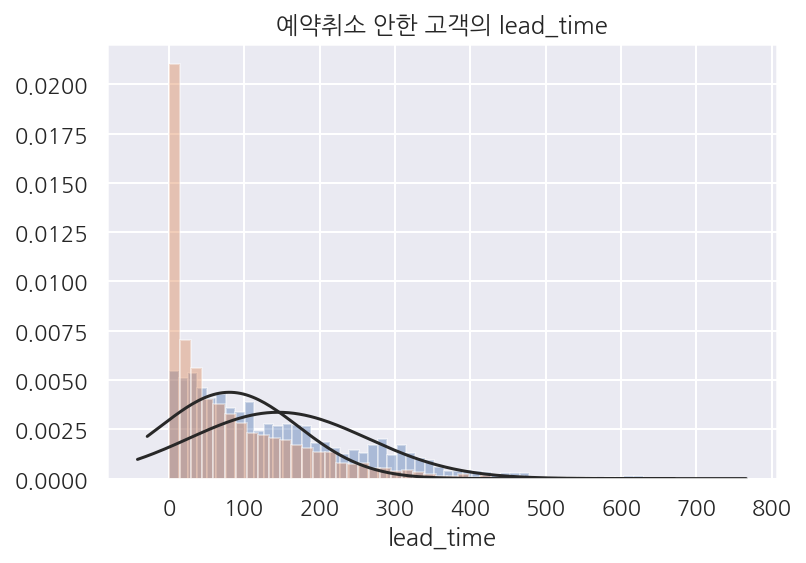

In [297]:
sns.distplot(df_lead_cancel["lead_time"], kde=False, fit=sp.stats.norm)
plt.title("예약취소한 고객의 lead_time")
#plt.show()


sns.distplot(df_lead_nt_cancel["lead_time"], kde=False, fit=sp.stats.norm)
plt.title("예약취소 안한 고객의 lead_time")
plt.show()

In [116]:
# 1개월(30일) 이내 호텔 예약한 비율 16.2% 차지(취소O)
df_lead_cancel_30 = df_lead_cancel[(df_lead_cancel["lead_time"] <= 30)]["lead_time"]
len(df_lead_cancel_30), len(df_lead_cancel_30) / 44199

(7168, 0.16217561483291476)

In [117]:
# 1개월(30일) 이내 호텔 예약한 비율 41.9% 차지(취소X)
df_lead_nt_cancel_30 = df_lead_nt_cancel[(df_lead_nt_cancel["lead_time"] <= 30)]["lead_time"]
len(df_lead_nt_cancel_30), len(df_lead_nt_cancel_30) / 75011

(31412, 0.4187652477636613)

In [118]:
# 4개월(120일) 이내 호텔 예약한 비율 51.9% 차지(취소O)
df_lead_cancel_120 = df_lead_cancel[(df_lead_cancel["lead_time"] <= 120)]["lead_time"]
len(df_lead_cancel_120), len(df_lead_cancel_120) / 44199

(22954, 0.5193330165840856)

In [119]:
# 4개월(120일) 이내 호텔 예약한 비율 74.1% 차지(취소X)
df_lead_nt_cancel_30 = df_lead_nt_cancel[(df_lead_nt_cancel["lead_time"] <= 120)]["lead_time"]
len(df_lead_nt_cancel_30), len(df_lead_nt_cancel_30) / 75011

(55584, 0.7410113183399768)

In [120]:
# lead_time과 취소 간 상관분석
df_lead_corr = df["lead_time"].corr(df["is_canceled"])
df_lead_corr
# 양의 상관관계 확인

0.29287565611237315

#### 가설 1 결론: lead_time이 길수록 호텔 취소율이 더 높음(양의 상관관계)
    - 호텔 예약을 3~4개월 이상 이전부터 할 경우 호텔 취소율이 높음
        - 호텔에 체크인하기 전까지 다른 호텔에 대한 정보 수집이 가능
        - 타호텔과 비교 및 검토할 시간 충분

#### 가설 2. 예치금이 환불되면 호텔 취소율이 높을 것이다.

In [121]:
# 예치금 유형별 건수 확인
df_depo = df.groupby("deposit_type").size().reset_index(name="counts")
df_depo

deposit_type  counts
0   No Deposit  104461
1   Non Refund   14587
2   Refundable     162

예치금 타입별 취소율

In [122]:
deposit_cl = df[["deposit_type", "is_canceled"]]

In [123]:
# deposit_type 별 그룹화 하여 count
deposit_cl1 = deposit_cl.groupby("deposit_type").size().reset_index(name="count")
deposit_cl1

deposit_type   count
0   No Deposit  104461
1   Non Refund   14587
2   Refundable     162

In [124]:
# deposit_type 그룹별 취소
deposit_cl2 = deposit_cl.groupby("deposit_type").agg("sum").reset_index()
deposit_cl2

deposit_type  is_canceled
0   No Deposit        29669
1   Non Refund        14494
2   Refundable           36

In [125]:
# count와 취소자료 결합
deposit_cl3 = deposit_cl1.merge(deposit_cl2)
deposit_cl3

deposit_type   count  is_canceled
0   No Deposit  104461        29669
1   Non Refund   14587        14494
2   Refundable     162           36

In [126]:
# 비율 계산
deposit_cl3["proportion"] = deposit_cl3["is_canceled"] / deposit_cl3["count"]
deposit_cl3

deposit_type   count  is_canceled  proportion
0   No Deposit  104461        29669    0.284020
1   Non Refund   14587        14494    0.993624
2   Refundable     162           36    0.222222

In [127]:
# 상관분석을 위한 예치금 유형 데이터 변경(원핫인코딩)
data = pd.get_dummies(df["deposit_type"])
df3 = pd.concat([df["is_canceled"], data], axis=1)
df3.tail()

is_canceled  No Deposit  Non Refund  Refundable
119205            0           1           0           0
119206            0           1           0           0
119207            0           1           0           0
119208            0           1           0           0
119209            0           1           0           0

In [128]:
# 상관분석 - 예치금 유형별 취소 여부의 상관관계
depo_cancel_corr = df3.corr()["is_canceled"]
depo_cancel_corr.sort_values(ascending=False)

is_canceled    1.000000
Non Refund     0.481507
Refundable    -0.011345
No Deposit    -0.477957
Name: is_canceled, dtype: float64

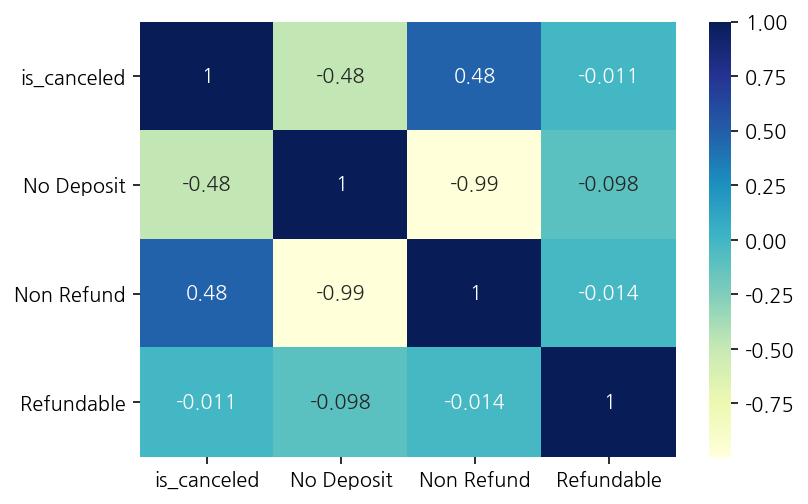

In [129]:
sns.heatmap(data=df3.corr(), cmap="YlGnBu", annot=True)

In [130]:
# Non Refund & cancel 고객 특성 확인
df_depo_cancel2_nd_cl = df[(df["deposit_type"]=="No Deposit") & (df["is_canceled"]==1)]
nd_cl = pd.DataFrame(df_depo_cancel2_nd_cl.mean())

df_depo_cancel2_nr_cl = df[(df["deposit_type"]=="Non Refund") & (df["is_canceled"]==1)]
nr_cl = pd.DataFrame(df_depo_cancel2_nr_cl.mean())

df_depo_cancel2_rf_cl = df[(df["deposit_type"]=="Refundable") & (df["is_canceled"]==1)]
rf_cl = pd.DataFrame(df_depo_cancel2_rf_cl.mean())

dt_cl = pd.concat([nd_cl, nr_cl, rf_cl], axis=1)
dt_cl.columns = ["No Deposit", "Non Refund", "Refundable"]
dt_cl.loc[["lead_time", "is_repeated_guest", "previous_cancellations"]]
# lead_time이 평균 약 213일로 7개월 이전부터 호텔을 예약한 고객들로 그 사이 다른 호텔로 예약을 옮길 가능성이 높음.

No Deposit  Non Refund  Refundable
lead_time               111.309144  213.593487  154.805556
is_repeated_guest         0.016516    0.004140    0.000000
previous_cancellations    0.108194    0.414102    0.000000

#### 가설 2 결론: 환불이 안될경우 오히려 취소율이 월등히 높다.

#### 가설 3. 고객의 예약변경(날짜, 룸타입 등) 건수가 많으면 호텔 취소율이 낮을 것이다.

In [131]:
df["booking_changes"].describe()

count    119210.000000
mean          0.218799
std           0.638504
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          18.000000
Name: booking_changes, dtype: float64

In [132]:
len(df[(df["booking_changes"]==0)])

101232

In [133]:
# 호텔 취소한 고객의 booking_changes 건수
df_bc_cl = df[(df["booking_changes"] >= 0) & (df["is_canceled"] == 1)][["booking_changes", "is_canceled"]]

# 호텔 취소 안한 고객의 booking_changes 건수
df_bc_nt_cl = df[(df["booking_changes"] >= 0) & (df["is_canceled"] == 0)][["booking_changes", "is_canceled"]]

In [134]:
df_bc_cl.describe()

booking_changes  is_canceled
count     44199.000000      44199.0
mean          0.098328          1.0
std           0.451069          0.0
min           0.000000          1.0
25%           0.000000          1.0
50%           0.000000          1.0
75%           0.000000          1.0
max          16.000000          1.0

In [135]:
df_bc_nt_cl.describe()

booking_changes  is_canceled
count     75011.000000      75011.0
mean          0.289784          0.0
std           0.717243          0.0
min           0.000000          0.0
25%           0.000000          0.0
50%           0.000000          0.0
75%           0.000000          0.0
max          18.000000          0.0

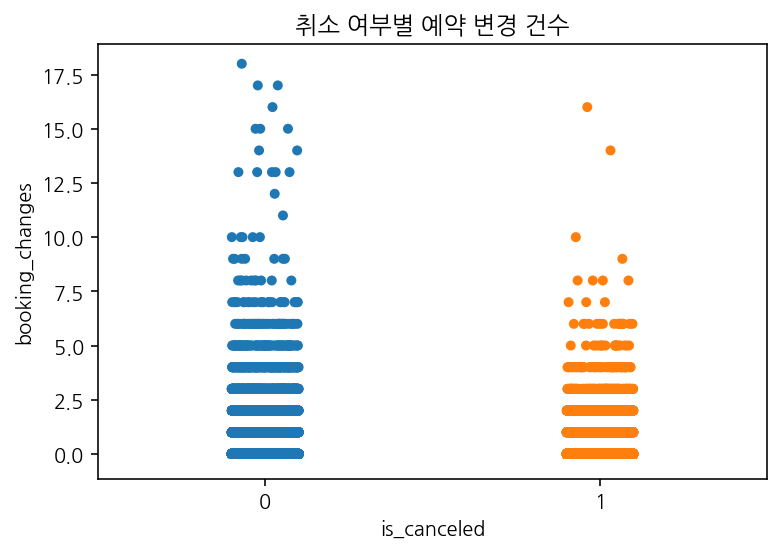

In [136]:
plt.title("취소 여부별 예약 변경 건수")
sns.stripplot(x = df["is_canceled"], y = df["booking_changes"], data=df)
plt.show()

In [137]:
# 예약변경과 취소 간 상관분석
change_cancel_corr = df["booking_changes"].corr(df["is_canceled"])
change_cancel_corr

-0.1448315628936005

#### 가설 3 결론: 예약 변경 건수가 많을수록 호텔 취소율은 낮다.

#### 가설 4. 고객의 special request(고층, bed 추가, 오션뷰 등) 건수가 많으면 호텔 취소율은 낮을 것이다.

In [138]:
df["total_of_special_requests"].describe()

count    119210.000000
mean          0.571504
std           0.792876
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: total_of_special_requests, dtype: float64

In [139]:
len(df[(df["total_of_special_requests"]==0)])

70201

In [140]:
# 호텔 취소한 고객의 total_of_special_requests 건수
df_sr_cl = df[(df["total_of_special_requests"] >= 0) & (df["is_canceled"] == 1)][["total_of_special_requests", "is_canceled"]]

# 호텔 취소 안한 고객의 total_of_special_requests 건수
df_sr_nt_cl = df[(df["total_of_special_requests"] >= 0) & (df["is_canceled"] == 0)][["total_of_special_requests", "is_canceled"]]

In [141]:
df_sr_cl.describe()

total_of_special_requests  is_canceled
count               44199.000000      44199.0
mean                    0.328899          1.0
std                     0.649236          0.0
min                     0.000000          1.0
25%                     0.000000          1.0
50%                     0.000000          1.0
75%                     0.000000          1.0
max                     5.000000          1.0

In [142]:
df_sr_nt_cl.describe()

total_of_special_requests  is_canceled
count               75011.000000      75011.0
mean                    0.714455          0.0
std                     0.834026          0.0
min                     0.000000          0.0
25%                     0.000000          0.0
50%                     1.000000          0.0
75%                     1.000000          0.0
max                     5.000000          0.0

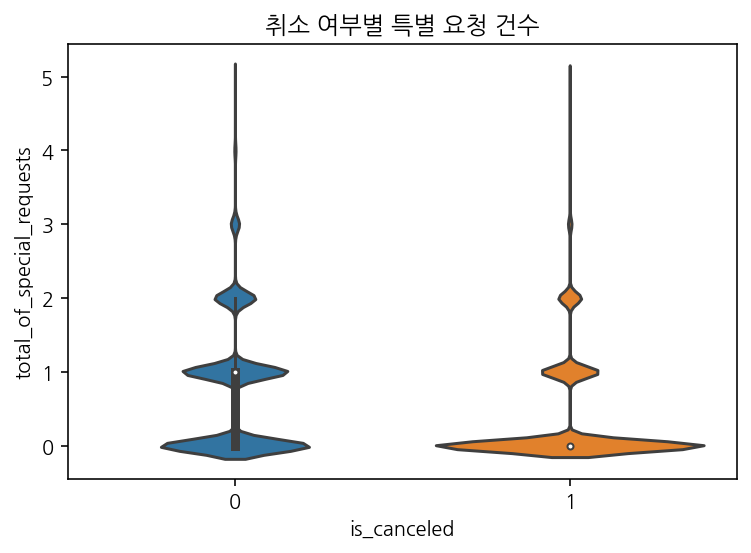

In [143]:
plt.title("취소 여부별 특별 요청 건수")
sns.violinplot(x = df["is_canceled"], y = df["total_of_special_requests"], data=df)
plt.show()

In [144]:
request_cancel_corr = df["total_of_special_requests"].corr(df["is_canceled"])
request_cancel_corr

-0.2348770033922238

#### 가설 4 결론: 고객의 special request(고층, bed 추가, 오션뷰 등) 건수가 많을수록 호텔 취소율은 낮다.

#### 가설 5. 아이를 동반한 고객의 호텔 취소율은 낮을 것이다.

In [145]:
# 아이 없이 어른만 있는 경우
only_adults = df[(df["adults"] > 0) & (df["children"] == 0) & (df["babies"] == 0)]

In [146]:
len(only_adults)
# 아이 없이 어른만 있는 경우 109,878 개

109878

In [147]:
only_adults_cl = df[(df["adults"] > 0) & (df["children"] == 0) & (df["babies"] == 0) & (df["is_canceled"] == 1)]

In [148]:
len(only_adults_cl)
# 어른만 있을 때 취소된 갯수 40,940

40940

In [149]:
40940 / 109878

0.3725950599756093

In [150]:
# chilren과 baby가 함께 있는 경우
a_w_bc = df[(df["adults"] > 0) & ((df["children"] > 0) | (df["babies"] > 0))]

In [151]:
len(a_w_bc)
# 아이가 있는 경우 9,109 개

9109

In [152]:
# children과 baby가 있는경우 취소된 예약
a_w_bc_cl = df[(df["adults"] > 0) & (df["is_canceled"] == 1) & ((df["children"] > 0) | (df["babies"] > 0))]

In [153]:
len(a_w_bc_cl)

3175

In [154]:
len(a_w_bc_cl) / len(a_w_bc)


0.348556372818092

In [155]:
# baby없이 children과 함께온 경우
a_w_ch = df[(df["adults"] > 0) & (df["children"] > 0) & (df["babies"] == 0)]

In [156]:
len(a_w_ch)
# children과 함께 온 경우 8195

8195

In [157]:
# children과 함께 왔는데 취소된 예약
a_w_ch_cl = df[(df["adults"] > 0) & (df["children"] > 0) & (df["babies"] == 0) & (df["is_canceled"] == 1)]

In [158]:
len(a_w_ch_cl)
# children과 함께 왔는데 취소된 예약

3009

In [159]:
len(a_w_ch_cl) / len(a_w_ch)

0.3671751067724222

In [160]:
# children 없이 baby 와 온 경우
a_w_b = df[(df2["adults"] > 0) & (df["children"] == 0) & (df["babies"] > 0)]

In [161]:
len(a_w_b)
# baby와만 온 경우 742

742

In [162]:
# baby와만 왔는데 취소된 예약
a_w_b_cl = df[(df["adults"] > 0) & (df["children"] == 0) & (df["babies"] > 0) & (df["is_canceled"] == 1)]

In [163]:
len(a_w_b_cl)

133

In [164]:
a = len(a_w_b_cl) / len(a_w_b)
round(a, 2)

0.18

In [165]:
only_ch = df[(df["adults"] == 0) & (df["children"] > 0) & (df["babies"] == 0)]

In [166]:
len(only_ch)

220

In [167]:
only_ch_cl = df[(df["adults"] == 0) & (df["children"] > 0) & (df["babies"] == 0) & (df["is_canceled"] == 1)]

In [168]:
len(only_ch_cl)

83

In [169]:
83 / 220

0.37727272727272726

In [170]:
# 요약 데이터프레임
result_df1 = {
    "counts":[len(only_adults), len(only_ch), len(a_w_ch), len(a_w_b), len(a_w_ch)],
    "canceled_rate":[round(len(only_adults_cl) / len(only_adults), 2), round(len(only_ch_cl) / len(only_ch), 2),
                    round(len(a_w_ch_cl) / len(a_w_ch), 2), round(len(a_w_b_cl) / len(a_w_b), 2),
                    round(len(a_w_bc_cl) / len(a_w_bc), 2)]  
    
}

In [171]:
result_df = pd.DataFrame(result_df1, index=["o/a", "o/c", "aw/c", "aw/b", "aw/bc"])
result_df

counts  canceled_rate
o/a    109878           0.37
o/c       220           0.38
aw/c     8195           0.37
aw/b      742           0.18
aw/bc    8195           0.35

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


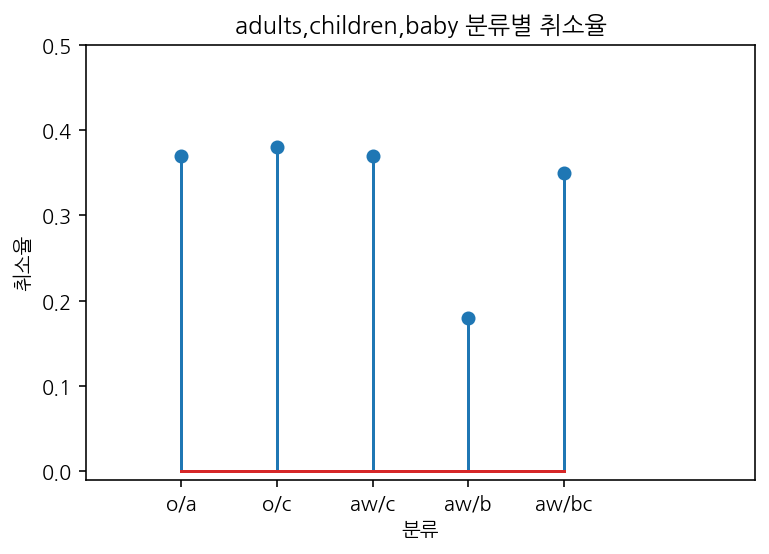

In [172]:
x = np.array(["o/a", "o/c", "aw/c", "aw/b", "aw/bc"])
y = np.array([0.37, 0.38, 0.37, 0.18, 0.35])
plt.stem(x, y)
plt.title("adults,children,baby 분류별 취소율")
plt.xlabel("분류")
plt.ylabel("취소율")
plt.xlim(-1, 6)
plt.ylim(-0.01, 0.5)
plt.xticks(np.arange(5))
plt.show()

#### 가설 5 결론: 유아를 동반한 고객의 취소율이 낮다.

#### 가설 6: 재방문 고객은 취소율이 낮을 것이다.

In [173]:
repeated_cl = df[["is_repeated_guest", "is_canceled"]]

In [174]:
# 재방문고객 분류 하여 count
repeated_cl1 = repeated_cl.groupby("is_repeated_guest").size().reset_index(name="count")
repeated_cl1

is_repeated_guest   count
0                  0  115455
1                  1    3755

In [175]:
# 재방문고객 그룹별 취소
repeated_cl2 = repeated_cl.groupby("is_repeated_guest").agg("sum").reset_index()
repeated_cl2

is_repeated_guest  is_canceled
0                  0        43649
1                  1          550

In [176]:
# count와 취소자료 결합
repeated_cl3 = repeated_cl1.merge(repeated_cl2)
repeated_cl3

is_repeated_guest   count  is_canceled
0                  0  115455        43649
1                  1    3755          550

In [177]:
# 비율 계산
repeated_cl3["proportion"] = repeated_cl3["is_canceled"] / repeated_cl3["count"]
repeated_cl3

is_repeated_guest   count  is_canceled  proportion
0                  0  115455        43649    0.378061
1                  1    3755          550    0.146471

방문 횟수와 취소율의 관계

In [178]:
pbnc_cl = df2[["previous_bookings_not_canceled", "is_canceled"]]

In [179]:
# 이전 예약 횟수별로 그룹화 한 후 해당 그룹 갯수 count
pbnc_cl1 = pbnc_cl.groupby("previous_bookings_not_canceled").size().reset_index(name="count")

In [180]:
# 해당 그룹 취소 횟수 합계
pbnc_cl2 = pbnc_cl.groupby("previous_bookings_not_canceled").agg("sum").reset_index()

In [181]:
# 위의 두 데이터 합치기
pbnc_cl3 = pbnc_cl1.merge(pbnc_cl2)
pbnc_cl3

previous_bookings_not_canceled   count  is_canceled
0                                0  115597        43999
1                                1    1538           79
2                                2     580           32
3                                3     333           17
4                                4     229           12
..                             ...     ...          ...
68                              68       1            0
69                              69       1            0
70                              70       1            0
71                              71       1            0
72                              72       1            0

[73 rows x 3 columns]

In [182]:
# 그룹별 취소 비율
pbnc_cl3["proportion"] = pbnc_cl3["is_canceled"] / pbnc_cl3["count"]

In [183]:
pbnc_cl3.loc[20:30]

previous_bookings_not_canceled  count  is_canceled  proportion
20                              20     12            0    0.000000
21                              21     12            0    0.000000
22                              22     10            0    0.000000
23                              23      7            0    0.000000
24                              24      9            0    0.000000
25                              25     17            8    0.470588
26                              26      7            1    0.142857
27                              27      9            2    0.222222
28                              28      7            0    0.000000
29                              29      6            1    0.166667
30                              30      4            0    0.000000

Text(0, 0.5, '취소율')

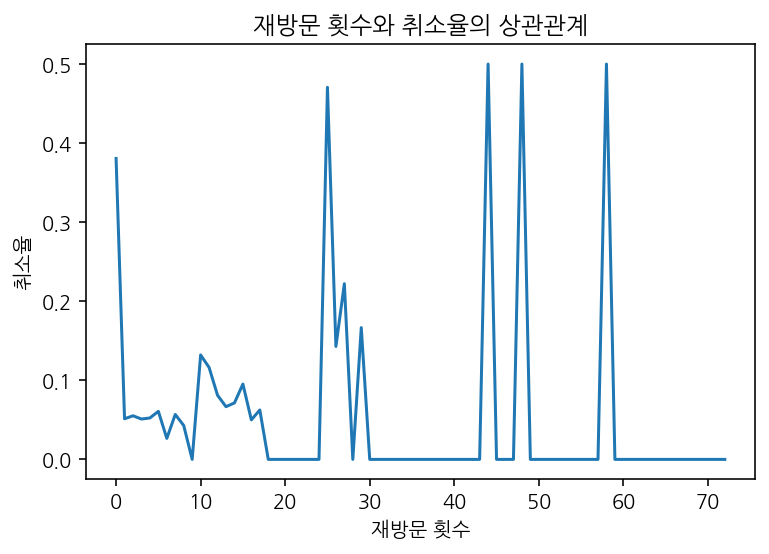

In [184]:
pbnc_cl3["proportion"].plot()
plt.title("재방문 횟수와 취소율의 상관관계")
plt.xlabel("재방문 횟수")
plt.ylabel("취소율")

#### 가설 6 결론: 재방문 고객은 취소율이 낮으나 재방문 횟수와 취소율은 큰 연관성이 없다.

#### 가설 7: 호텔 가격이 비싸면 취소율이 낮을 것이다.

In [185]:
df["adr"].describe()

count    119210.000000
mean        101.969092
std          50.434007
min          -6.380000
25%          69.500000
50%          94.950000
75%         126.000000
max        5400.000000
Name: adr, dtype: float64

In [186]:
# 호텔 취소한 고객의 adr
adr_cl = df[df["is_canceled"] == 1][["adr", "is_canceled"]]

# 호텔 취소 안한 고객의 adr
adr_n_cl = df[df["is_canceled"] == 0][["adr", "is_canceled"]]

In [187]:
adr_cl.describe()

adr  is_canceled
count  44199.000000      44199.0
mean     105.023703          1.0
std       52.526686          0.0
min        0.000000          1.0
25%       72.800000          1.0
50%       96.300000          1.0
75%      127.670000          1.0
max     5400.000000          1.0

In [188]:
adr_n_cl.describe()

adr  is_canceled
count  75011.000000      75011.0
mean     100.169212          0.0
std       49.070644          0.0
min       -6.380000          0.0
25%       67.760000          0.0
50%       92.700000          0.0
75%      125.000000          0.0
max      510.000000          0.0

In [189]:
# resort 호텔과 city 호텔 나누기, 실제 온 고객을 분석하기 위해 취소되지 않은 데이터 사용
rh = df[(df["hotel"] == "Resort Hotel") & (df["is_canceled"] == 0)]
ch = df[(df["hotel"] == "City Hotel") & (df["is_canceled"] == 0)]

In [190]:
rh_adr = rh["adr"]
rh_adr.describe()

count    28927.000000
mean        90.822527
std         59.306929
min         -6.380000
25%         48.000000
50%         72.000000
75%        118.220000
max        508.000000
Name: adr, dtype: float64

In [191]:
ch_adr = ch["adr"]
ch_adr.describe()

count    46084.000000
mean       106.036141
std         40.278632
min          0.000000
25%         80.000000
50%        100.000000
75%        126.000000
max        510.000000
Name: adr, dtype: float64

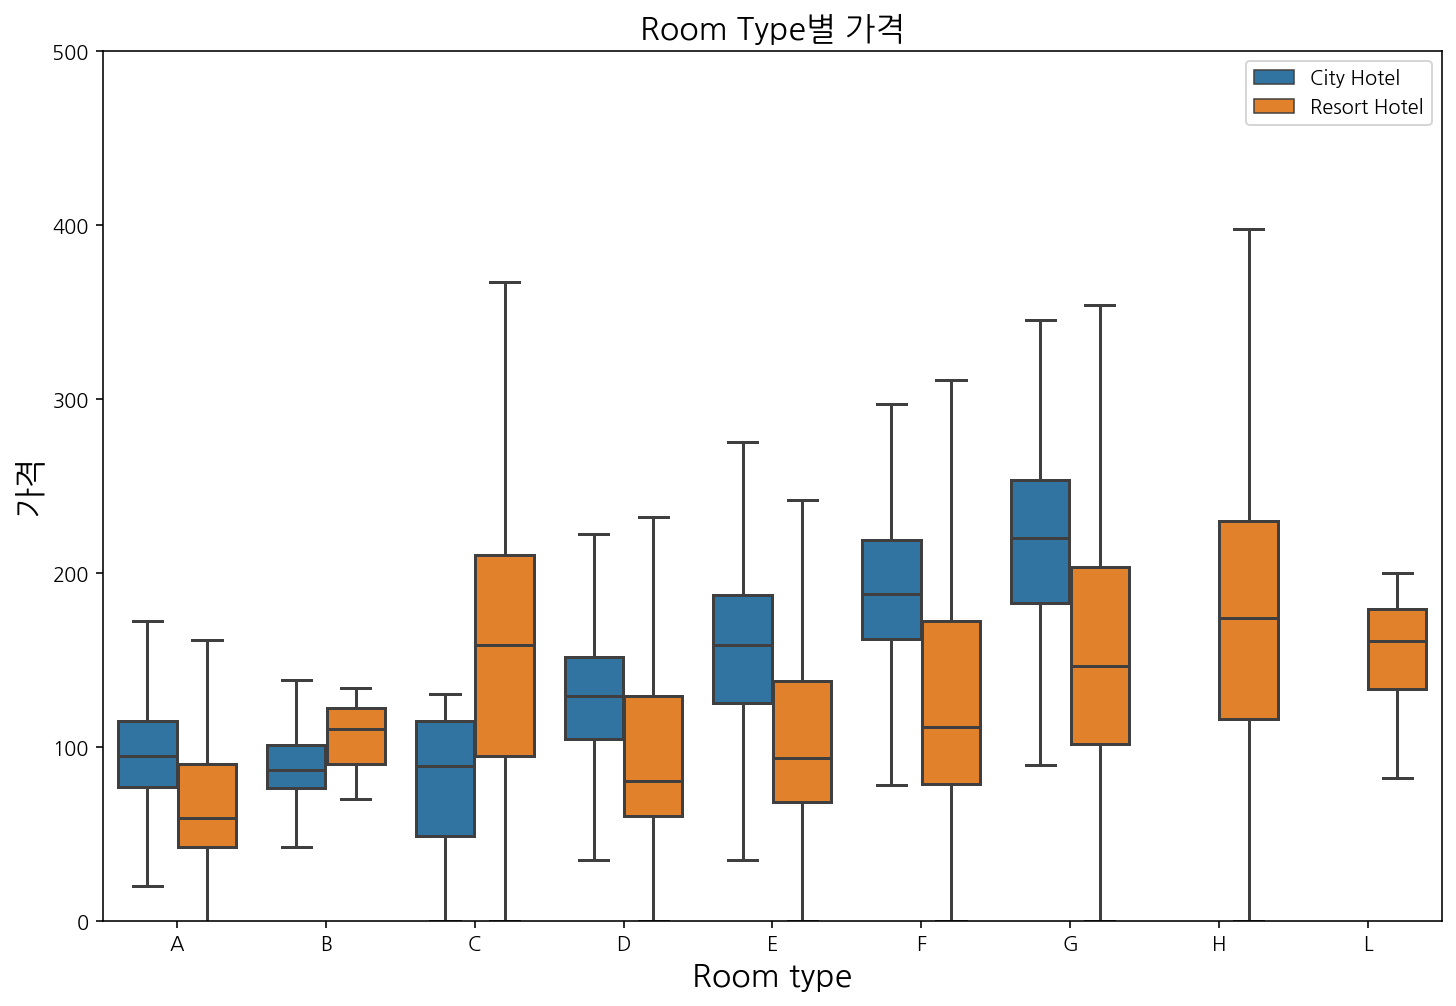

In [192]:
# 호텔 분류, 및 방 type 별 box-plot
adr_df = df[df["is_canceled"] == 0][["hotel", "reserved_room_type", "adr"]].sort_values("reserved_room_type")

# boxplot:
plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr",
            hue="hotel",
            data=adr_df,
            hue_order=["City Hotel", "Resort Hotel"],
            fliersize=0)
plt.title("Room Type별 가격", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("가격", fontsize=16)
plt.legend(loc="upper right")
plt.ylim(0, 500)
plt.show()


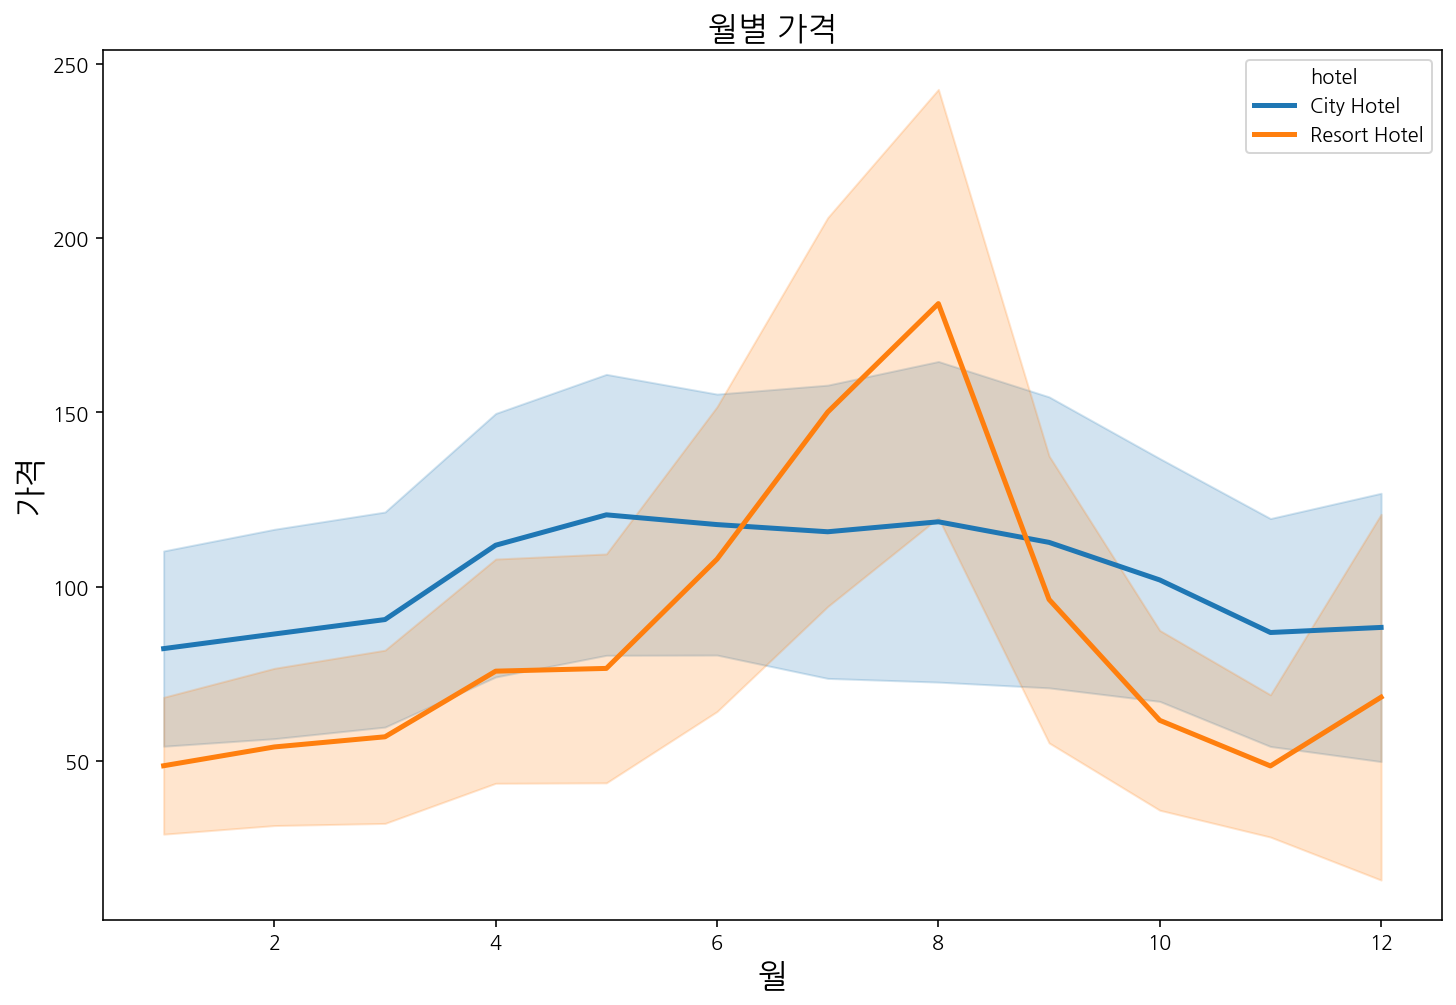

In [193]:
# 취소되지 않은 건의 월별 가격:
room_prices_mothly = df[df["is_canceled"] == 0][["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# 월별 순서로 정렬:
ordered_months = np.arange(1, 12 + 1)
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# 표준편차와 함께 그려진 barplot 그래프:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("월별 가격", fontsize=16)
plt.xlabel("월", fontsize=16)
plt.xticks(rotation=0)
plt.ylabel("가격", fontsize=16)
plt.show()

In [194]:
adr_cl = df[["adr", "is_canceled"]]
adr_cl1 = adr_cl.groupby("adr").size().reset_index(name="count")
adr_cl2 = adr_cl.groupby("adr").agg("sum").reset_index()
adr_cl3 = adr_cl1.merge(adr_cl2)
adr_cl3["proportion"] = adr_cl3["is_canceled"] / adr_cl3["count"]
adr_cl3

adr  count  is_canceled  proportion
0       -6.38      1            0    0.000000
1        0.00   1810          188    0.103867
2        0.26      1            0    0.000000
3        0.50      1            1    1.000000
4        1.00     14            3    0.214286
...       ...    ...          ...         ...
8861   450.00      1            1    1.000000
8862   451.50      1            0    0.000000
8863   508.00      1            0    0.000000
8864   510.00      1            0    0.000000
8865  5400.00      1            1    1.000000

[8866 rows x 4 columns]

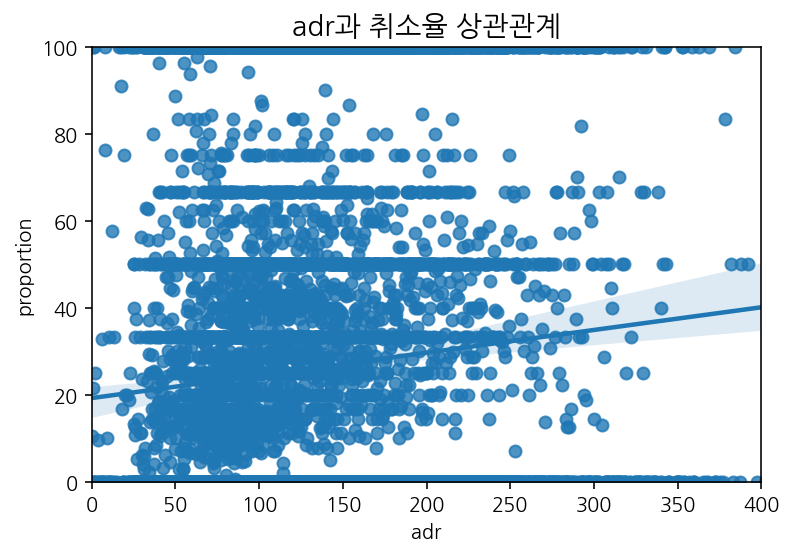

In [195]:
sns.regplot(x=adr_cl3['adr'], 

           y=adr_cl3['proportion'] * 100, 

           fit_reg=True)

plt.title('adr과 취소율 상관관계', fontsize=14)
plt.xlim(0,400)
plt.ylim(0,100)
plt.show()


#### 가설 7 결론: 가격과 취소율은 양의 상관관계가 있다.

#### 가설 8 : 성수기 때 호텔 취소율이 낮을 것이다. 

In [196]:
#Resort Hotel의 월별 데이터 수
#Resort 데이터만 선택해서 월별 resort 호텔 수를 count
res_all_count = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_all_count

arrival_date_month
1     2191
2     3102
3     3334
4     3609
5     3559
6     3044
7     4573
8     4894
9     3108
10    3553
11    2435
12    2645
Name: hotel, dtype: int64

In [197]:
# list로 변경
# 위 데이터의 인덱스를 뽑아서 list로 만듦.
ls_res_all_count_idx=list(res_all_count.index)

In [198]:
# list로 변경
# 맨 위의 데이터 값을 list로 만듦.
ls_res_all_count=list(res_all_count)
ls_res_all_count

[2191, 3102, 3334, 3609, 3559, 3044, 4573, 4894, 3108, 3553, 2435, 2645]

In [199]:
# Resort Hotel의 월별 취소 갯수
res_cancel_month = df.loc[(df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()


In [200]:
# 위의 변수를 list로 변경 

ls_res_cancel_month=list(res_cancel_month)

In [201]:
# City Hotel의 월별 데이터 갯수 구하기
#City Hotel 데이터만 선택해서 월별 city 호텔 수를 count
cit_all_count = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cit_all_count

arrival_date_month
1     3730
2     4950
3     6434
4     7469
5     8221
6     7885
7     8071
8     8967
9     7392
10    7594
11    4336
12    4114
Name: hotel, dtype: int64

In [202]:
# 위의 데이터 프레임 인덱스를 list로 변경
ls_cit_all_count_idx=list(cit_all_count.index)

In [203]:
# city hotel의 데이터 프레임 값을list로 변경
ls_cit_all_count=list(cit_all_count)

In [204]:
# City Hotel의 월별 취소 갯수 구하기 (sum해서 취소한 것만 구함)
cit_cancel_month = df.loc[(df["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [205]:
# 위의 변수 list로 변경
ls_cit_cancel_month=list(cit_cancel_month)

In [206]:
#Resort Hotel의 내용을 데이터프레임으로 만들기
res_cancel = pd.DataFrame({"Hotel" : "Resort Hotel",
                          "arrival_date_month": ls_res_all_count_idx,
                          "res_all_counts":ls_res_all_count,
                          "res_cancelation":ls_res_cancel_month})
res_cancel

Hotel  arrival_date_month  res_all_counts  res_cancelation
0   Resort Hotel                   1            2191              325
1   Resort Hotel                   2            3102              794
2   Resort Hotel                   3            3334              763
3   Resort Hotel                   4            3609             1059
4   Resort Hotel                   5            3559             1024
5   Resort Hotel                   6            3044             1007
6   Resort Hotel                   7            4573             1436
7   Resort Hotel                   8            4894             1637
8   Resort Hotel                   9            3108             1006
9   Resort Hotel                  10            3553              978
10  Resort Hotel                  11            2435              460
11  Resort Hotel                  12            2645              631

In [207]:
#City Hotel의 내용을 데이터프레임으로 만들기
cit_cancel = pd.DataFrame({"Hotel" : "City Hotel",
                          "arrival_date_month": ls_cit_all_count_idx,
                          "res_all_counts":ls_cit_all_count,
                          "res_cancelation":ls_cit_cancel_month})
cit_cancel

Hotel  arrival_date_month  res_all_counts  res_cancelation
0   City Hotel                   1            3730             1481
1   City Hotel                   2            4950             1899
2   City Hotel                   3            6434             2385
3   City Hotel                   4            7469             3459
4   City Hotel                   5            8221             3653
5   City Hotel                   6            7885             3527
6   City Hotel                   7            8071             3301
7   City Hotel                   8            8967             3600
8   City Hotel                   9            7392             3109
9   City Hotel                  10            7594             3268
10  City Hotel                  11            4336             1660
11  City Hotel                  12            4114             1737

In [208]:
# Resort 와 City의 데이터 프레임 합치기
res_cit_cancel=pd.concat([res_cancel, cit_cancel], ignore_index=True)

In [209]:
# 전체 데이터에서 월별 취소 비율 계산해서 위의 데이터 프레임에 합침
res_cit_cancel["percent"] = res_cit_cancel["res_cancelation"] / res_cit_cancel["res_all_counts"] * 100
res_cit_cancel.tail()

Hotel  arrival_date_month  res_all_counts  res_cancelation    percent
19  City Hotel                   8            8967             3600  40.147206
20  City Hotel                   9            7392             3109  42.058983
21  City Hotel                  10            7594             3268  43.033974
22  City Hotel                  11            4336             1660  38.284133
23  City Hotel                  12            4114             1737  42.221682

In [210]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, '월별 취소율')

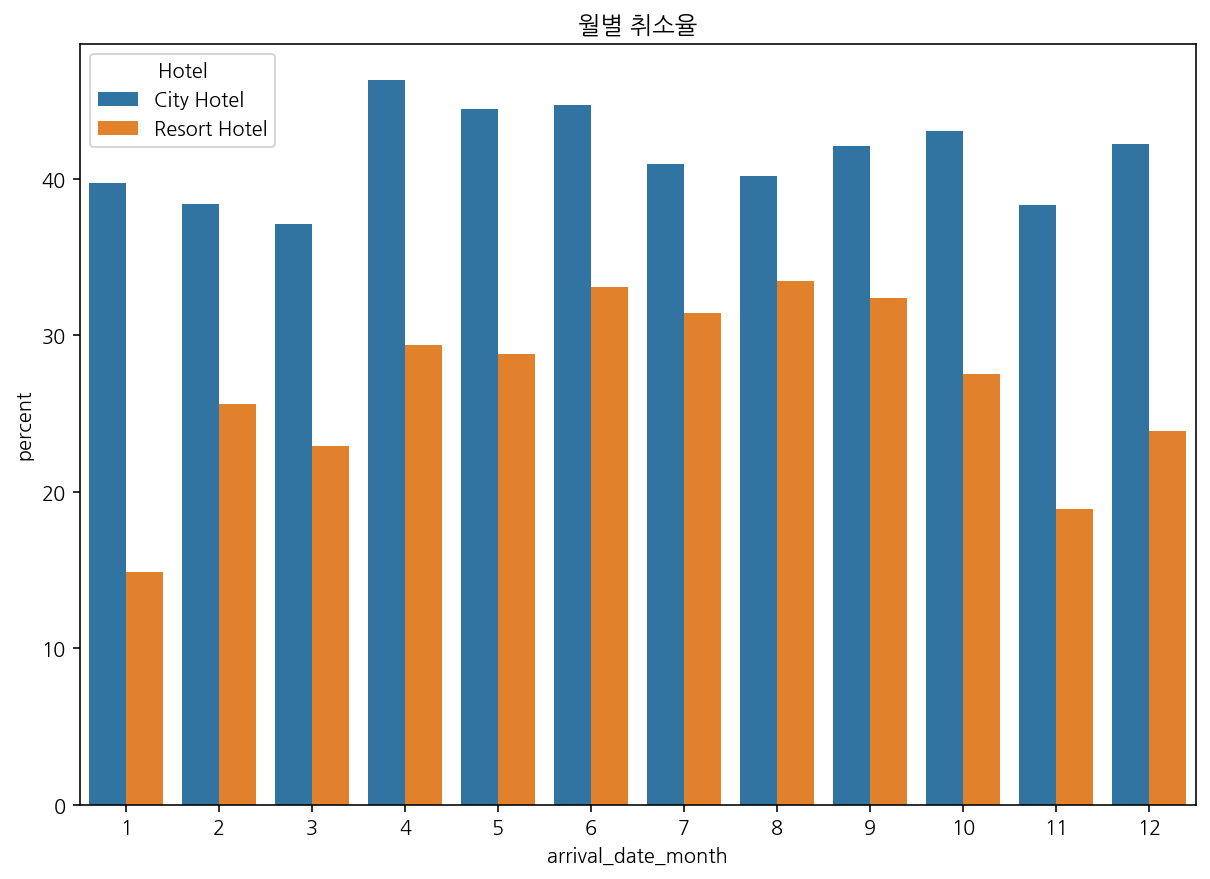

In [211]:
# 월별 취소율 그래프
plt.figure(figsize=(10, 7))
sns.barplot(x = "arrival_date_month", y = "percent",hue_order = ["City Hotel", "Resort Hotel"], hue="Hotel", data=res_cit_cancel)
plt.title("월별 취소율")

# Resort보다 City 호텔의 취소율이 더 높았음
# Resort, City 모두 겨울(11, 12, 1월)의 취소율이 다른 월에 비해 낮았음

### Resort와 City Hotel의 월별 방문객 수

In [212]:
#Resort의 월별 adult 수 - 실제 resort 방문객의 성인 수를 월별로 나타냄
res_adult = df.loc[(df["is_canceled"] == 0) & (df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["adults"].sum()
res_adult,sum(res_adult)

(arrival_date_month
 1     3062
 2     4066
 3     4424
 4     4473
 5     4634
 6     3867
 7     6311
 8     6640
 9     4006
 10    4619
 11    3348
 12    3574
 Name: adults, dtype: int64,
 53024)

In [213]:
# 위의 데이터 인덱스를 list 변환
ls_res_adult_idx = list(res_adult.index)

In [214]:
#위에서 구한 resort 방문 성인 데이터를 list 변환
ls_res_adult=list(res_adult)

In [215]:
# Resort의 월별 방문 children 수 
res_children = df.loc[(df["is_canceled"] == 0) & (df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["children"].sum()
sum(res_children)

3075

In [216]:
#위의 변수 list 변환
ls_res_children = list(res_children)

In [217]:
# Resort의 월별 baby 수
res_babies = df.loc[(df["is_canceled"] == 0) & (df["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["babies"].sum()
sum(res_babies)

452

In [218]:
#list 변환
ls_res_babies = list(res_babies)

In [219]:
# Resort 데이터 프레임 만들기
res_people = pd.DataFrame({"Hotel" : "Resort Hotel",
                          "arrival_date_month": ls_res_adult_idx,
                          "adults":ls_res_adult,
                          "children":ls_res_children,
                          "babies": ls_res_babies })

In [220]:
# City 월별 adult 수 - 실제 방문한 city hotel adult 고객의 수를 월별로 나타냄
cit_adult = df.loc[(df["is_canceled"] == 0) & (df["hotel"] == "City Hotel")].groupby("arrival_date_month")["adults"].sum()
sum(cit_adult)

84510

In [221]:
#위의 데이터 인덱스를 list 변환
ls_cit_adult_idx = list(cit_adult.index)

In [222]:
# cit_adult데이터 list 변환
ls_cit_adult = list(cit_adult)

In [223]:
# City 월별 children 수
cit_children = df.loc[(df["is_canceled"] == 0) & (df["hotel"] == "City Hotel")].groupby("arrival_date_month")["children"].sum()
sum(cit_children)

4618

In [224]:
#list 변환
ls_cit_children = list(cit_children)

In [225]:
# City의 월별 baby 수
cit_babies = df.loc[(df["is_canceled"] == 0) & (df["hotel"] == "City Hotel")].groupby("arrival_date_month")["babies"].sum()
sum(cit_babies)

328

In [226]:
#list 변환
ls_cit_babies = list(cit_babies)

In [227]:
# City 데이터 프레임 만들기
cit_people = pd.DataFrame({"Hotel" : "City Hotel",
                           
                          "arrival_date_month": ls_res_adult_idx,
                          "adults":ls_cit_adult,
                          "children":ls_cit_children,
                          "babies": ls_cit_babies })

In [228]:
# Resort 데이터 프레임과 City 데이터 프레임 합치기
all_people=pd.concat([res_people, cit_people],ignore_index=True)

In [229]:
# 위에서 합친 데이터 프레임에 adult, children babies 수를 합쳐서 sum_people 컬럼에 표시. 하나의 데이터 프레임을 만듦
all_people["sum_people"] = all_people["adults"] + all_people["children"] + all_people["babies"]
all_people

Hotel  arrival_date_month  adults  children  babies  sum_people
0   Resort Hotel                   1    3062       106      16        3184
1   Resort Hotel                   2    4066       212      28        4306
2   Resort Hotel                   3    4424       162      25        4611
3   Resort Hotel                   4    4473       190      24        4687
4   Resort Hotel                   5    4634       181      48        4863
5   Resort Hotel                   6    3867       225      32        4124
6   Resort Hotel                   7    6311       675      65        7051
7   Resort Hotel                   8    6640       773     105        7518
8   Resort Hotel                   9    4006       137      30        4173
9   Resort Hotel                  10    4619       150      24        4793
10  Resort Hotel                  11    3348        88      20        3456
11  Resort Hotel                  12    3574       176      35        3785
12    City Hotel                   1    3779       194      29        4002
13    City Hotel                   2    5369       324      30        5723
14    City Hotel                   3    7357       249      28        7634
15    City Hotel                   4    7665       465      16        8146
16    City Hotel                   5    8297       269      13        8579
17    City Hotel                   6    8032       342      22        8396
18    City Hotel                   7    9388       851      27       10266
19    City Hotel                   8   10528      1039      53       11620
20    City Hotel                   9    7643       214      38        7895
21    City Hotel                  10    7610       287      30        7927
22    City Hotel                  11    4449        97      15        4561
23    City Hotel                  12    4393       287      27        4707

In [230]:
# 7월과 8월은 3개년 데이터라서 3으로 나눠서 정규화
all_people.loc[(all_people["arrival_date_month"] == 7) | (all_people["arrival_date_month"] == 8),"sum_people"]/= 3

In [231]:
# 7월과 8월을 제외한 월은 2개년 데이터 라서 2로 나누어 정규화
all_people.loc[~((all_people["arrival_date_month"] == 7) | (all_people["arrival_date_month"] == 8)),"sum_people"]/=2

In [232]:
all_people

Hotel  arrival_date_month  adults  children  babies   sum_people
0   Resort Hotel                   1    3062       106      16  1592.000000
1   Resort Hotel                   2    4066       212      28  2153.000000
2   Resort Hotel                   3    4424       162      25  2305.500000
3   Resort Hotel                   4    4473       190      24  2343.500000
4   Resort Hotel                   5    4634       181      48  2431.500000
5   Resort Hotel                   6    3867       225      32  2062.000000
6   Resort Hotel                   7    6311       675      65  2350.333333
7   Resort Hotel                   8    6640       773     105  2506.000000
8   Resort Hotel                   9    4006       137      30  2086.500000
9   Resort Hotel                  10    4619       150      24  2396.500000
10  Resort Hotel                  11    3348        88      20  1728.000000
11  Resort Hotel                  12    3574       176      35  1892.500000
12    City Hotel                   1    3779       194      29  2001.000000
13    City Hotel                   2    5369       324      30  2861.500000
14    City Hotel                   3    7357       249      28  3817.000000
15    City Hotel                   4    7665       465      16  4073.000000
16    City Hotel                   5    8297       269      13  4289.500000
17    City Hotel                   6    8032       342      22  4198.000000
18    City Hotel                   7    9388       851      27  3422.000000
19    City Hotel                   8   10528      1039      53  3873.333333
20    City Hotel                   9    7643       214      38  3947.500000
21    City Hotel                  10    7610       287      30  3963.500000
22    City Hotel                  11    4449        97      15  2280.500000
23    City Hotel                  12    4393       287      27  2353.500000

Text(0.5, 1.0, '월별 호텔 방문객 수')

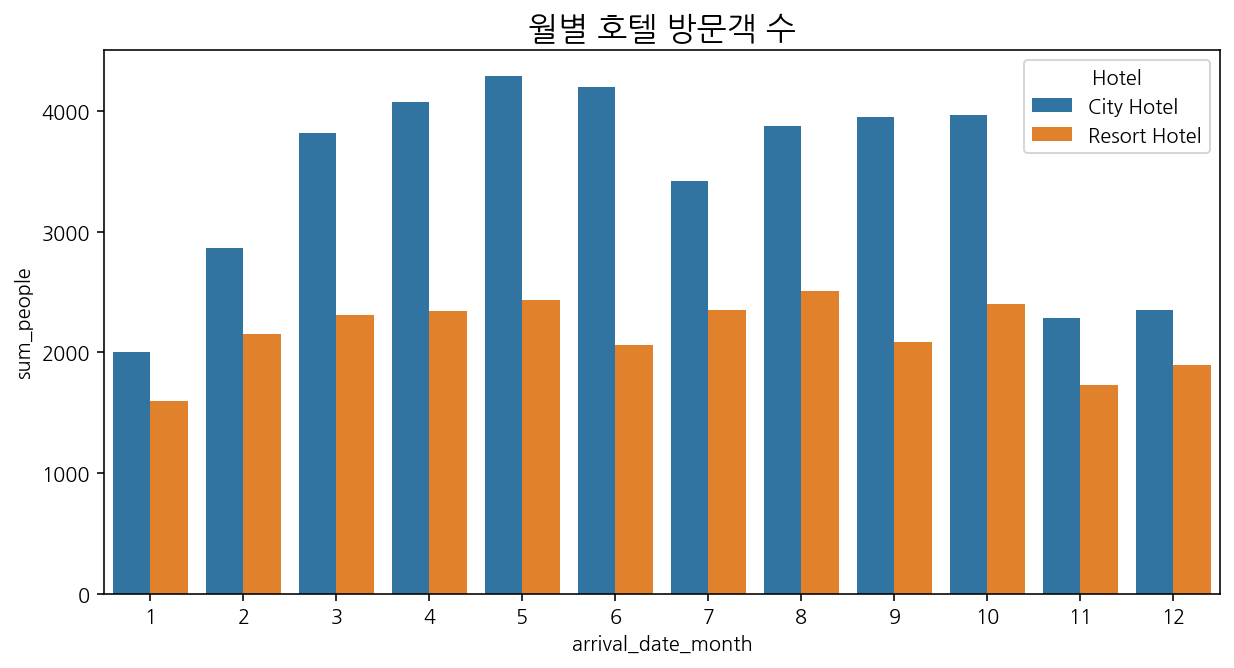

In [233]:
# 월별 방문객 수 그래프
plt.figure(figsize=(10, 5))
sns.barplot(x = "arrival_date_month", y = "sum_people",hue_order = ["City Hotel", "Resort Hotel"], hue="Hotel", data=all_people)
plt.title("월별 호텔 방문객 수", fontsize=16)

#### 내국인과 외국인의 월별 방문객 

In [234]:
#prt의 월별 adult 수 - 실제 방문한 prt 성인 수를 월별로 나타냄
prt_adult = df.loc[(df["is_canceled"] == 0) & (df["country"] == "PRT")].groupby("arrival_date_month")["adults"].sum().reset_index()
prt_adult

arrival_date_month  adults
0                    1    2476
1                    2    3166
2                    3    3015
3                    4    2499
4                    5    2389
5                    6    2509
6                    7    4362
7                    8    4528
8                    9    2842
9                   10    3045
10                  11    2318
11                  12    2763

In [235]:
#prt의 월별 children 수 - 실제 방문한 children수를 월별로 나타냄
prt_children = df.loc[(df["is_canceled"] == 0) & (df["country"] == "PRT")].groupby("arrival_date_month")["children"].sum().reset_index()
prt_children

arrival_date_month  children
0                    1        92
1                    2       132
2                    3       107
3                    4       106
4                    5        85
5                    6       130
6                    7       406
7                    8       544
8                    9       100
9                   10        76
10                  11        83
11                  12       157

In [236]:
#prt의 월별 baby 수 - 실제 방문한 baby 수를 월별로 나타냄
prt_baby = df.loc[(df["is_canceled"] == 0) & (df["country"] == "PRT")].groupby("arrival_date_month")["babies"].sum().reset_index()
prt_baby

arrival_date_month  babies
0                    1      24
1                    2      24
2                    3      20
3                    4      15
4                    5      15
5                    6      17
6                    7      48
7                    8      87
8                    9      27
9                   10      10
10                  11      13
11                  12      26

In [237]:
prt_ad_ch = prt_adult.merge(prt_children)
prt_ad_ch

arrival_date_month  adults  children
0                    1    2476        92
1                    2    3166       132
2                    3    3015       107
3                    4    2499       106
4                    5    2389        85
5                    6    2509       130
6                    7    4362       406
7                    8    4528       544
8                    9    2842       100
9                   10    3045        76
10                  11    2318        83
11                  12    2763       157

In [238]:
prt_all = prt_ad_ch.merge(prt_baby)
prt_all

arrival_date_month  adults  children  babies
0                    1    2476        92      24
1                    2    3166       132      24
2                    3    3015       107      20
3                    4    2499       106      15
4                    5    2389        85      15
5                    6    2509       130      17
6                    7    4362       406      48
7                    8    4528       544      87
8                    9    2842       100      27
9                   10    3045        76      10
10                  11    2318        83      13
11                  12    2763       157      26

In [239]:
prt_all["total"] = prt_all["adults"] + prt_all["children"] + prt_all["babies"]
prt_all

arrival_date_month  adults  children  babies  total
0                    1    2476        92      24   2592
1                    2    3166       132      24   3322
2                    3    3015       107      20   3142
3                    4    2499       106      15   2620
4                    5    2389        85      15   2489
5                    6    2509       130      17   2656
6                    7    4362       406      48   4816
7                    8    4528       544      87   5159
8                    9    2842       100      27   2969
9                   10    3045        76      10   3131
10                  11    2318        83      13   2414
11                  12    2763       157      26   2946

In [240]:
# 7월과 8월은 3개년 데이터라서 3으로 나눠서 정규화
prt_all.loc[(prt_all["arrival_date_month"] == 7) | (prt_all["arrival_date_month"] == 8),"total"]/= 3
prt_all

arrival_date_month  adults  children  babies        total
0                    1    2476        92      24  2592.000000
1                    2    3166       132      24  3322.000000
2                    3    3015       107      20  3142.000000
3                    4    2499       106      15  2620.000000
4                    5    2389        85      15  2489.000000
5                    6    2509       130      17  2656.000000
6                    7    4362       406      48  1605.333333
7                    8    4528       544      87  1719.666667
8                    9    2842       100      27  2969.000000
9                   10    3045        76      10  3131.000000
10                  11    2318        83      13  2414.000000
11                  12    2763       157      26  2946.000000

In [241]:
# 7월과 8월을 제외한 월은 2개년 데이터 라서 2로 나누어 정규화
prt_all.loc[~((prt_all["arrival_date_month"] == 7) | (prt_all["arrival_date_month"] == 8)),"total"]/=2
prt_all

arrival_date_month  adults  children  babies        total
0                    1    2476        92      24  1296.000000
1                    2    3166       132      24  1661.000000
2                    3    3015       107      20  1571.000000
3                    4    2499       106      15  1310.000000
4                    5    2389        85      15  1244.500000
5                    6    2509       130      17  1328.000000
6                    7    4362       406      48  1605.333333
7                    8    4528       544      87  1719.666667
8                    9    2842       100      27  1484.500000
9                   10    3045        76      10  1565.500000
10                  11    2318        83      13  1207.000000
11                  12    2763       157      26  1473.000000

In [242]:
#non_prt의 월별 adult 수 - 실제 방문한 non_prt 성인 수를 월별로 나타냄
nprt_adult = df.loc[(df["is_canceled"] == 0) & (df["country"] != "PRT")].groupby("arrival_date_month")["adults"].sum().reset_index()
nprt_adult

arrival_date_month  adults
0                    1    4365
1                    2    6269
2                    3    8766
3                    4    9639
4                    5   10542
5                    6    9390
6                    7   11337
7                    8   12640
8                    9    8807
9                   10    9184
10                  11    5479
11                  12    5204

In [243]:
#non prt의 월별 children 수 - 실제 방문한 children수를 월별로 나타냄
nprt_children = df.loc[(df["is_canceled"] == 0) & (df["country"] != "PRT")].groupby("arrival_date_month")["children"].sum().reset_index()
nprt_children

arrival_date_month  children
0                    1       208
1                    2       404
2                    3       304
3                    4       549
4                    5       365
5                    6       437
6                    7      1120
7                    8      1268
8                    9       251
9                   10       361
10                  11       102
11                  12       306

In [244]:
#nprt의 월별 baby 수 - 실제 방문한 baby 수를 월별로 나타냄
nprt_baby = df.loc[(df["is_canceled"] == 0) & (df["country"] != "PRT")].groupby("arrival_date_month")["babies"].sum().reset_index()
nprt_baby

arrival_date_month  babies
0                    1      21
1                    2      34
2                    3      33
3                    4      25
4                    5      46
5                    6      37
6                    7      44
7                    8      71
8                    9      41
9                   10      44
10                  11      22
11                  12      36

In [245]:
nprt_ad_ch = nprt_adult.merge(nprt_children)
nprt_ad_ch

arrival_date_month  adults  children
0                    1    4365       208
1                    2    6269       404
2                    3    8766       304
3                    4    9639       549
4                    5   10542       365
5                    6    9390       437
6                    7   11337      1120
7                    8   12640      1268
8                    9    8807       251
9                   10    9184       361
10                  11    5479       102
11                  12    5204       306

In [246]:
nprt_all = nprt_ad_ch.merge(nprt_baby)
nprt_all

arrival_date_month  adults  children  babies
0                    1    4365       208      21
1                    2    6269       404      34
2                    3    8766       304      33
3                    4    9639       549      25
4                    5   10542       365      46
5                    6    9390       437      37
6                    7   11337      1120      44
7                    8   12640      1268      71
8                    9    8807       251      41
9                   10    9184       361      44
10                  11    5479       102      22
11                  12    5204       306      36

In [247]:
nprt_all["total"] = nprt_all["adults"] + nprt_all["children"] + nprt_all["babies"]
nprt_all

arrival_date_month  adults  children  babies  total
0                    1    4365       208      21   4594
1                    2    6269       404      34   6707
2                    3    8766       304      33   9103
3                    4    9639       549      25  10213
4                    5   10542       365      46  10953
5                    6    9390       437      37   9864
6                    7   11337      1120      44  12501
7                    8   12640      1268      71  13979
8                    9    8807       251      41   9099
9                   10    9184       361      44   9589
10                  11    5479       102      22   5603
11                  12    5204       306      36   5546

In [248]:
# 7월과 8월은 3개년 데이터라서 3으로 나눠서 정규화
nprt_all.loc[(nprt_all["arrival_date_month"] == 7) | (nprt_all["arrival_date_month"] == 8),"total"]/= 3
nprt_all

arrival_date_month  adults  children  babies         total
0                    1    4365       208      21   4594.000000
1                    2    6269       404      34   6707.000000
2                    3    8766       304      33   9103.000000
3                    4    9639       549      25  10213.000000
4                    5   10542       365      46  10953.000000
5                    6    9390       437      37   9864.000000
6                    7   11337      1120      44   4167.000000
7                    8   12640      1268      71   4659.666667
8                    9    8807       251      41   9099.000000
9                   10    9184       361      44   9589.000000
10                  11    5479       102      22   5603.000000
11                  12    5204       306      36   5546.000000

In [249]:
# 7월과 8월을 제외한 월은 2개년 데이터 라서 2로 나누어 정규화
nprt_all.loc[~((nprt_all["arrival_date_month"] == 7) | (nprt_all["arrival_date_month"] == 8)),"total"]/=2
nprt_all

arrival_date_month  adults  children  babies        total
0                    1    4365       208      21  2297.000000
1                    2    6269       404      34  3353.500000
2                    3    8766       304      33  4551.500000
3                    4    9639       549      25  5106.500000
4                    5   10542       365      46  5476.500000
5                    6    9390       437      37  4932.000000
6                    7   11337      1120      44  4167.000000
7                    8   12640      1268      71  4659.666667
8                    9    8807       251      41  4549.500000
9                   10    9184       361      44  4794.500000
10                  11    5479       102      22  2801.500000
11                  12    5204       306      36  2773.000000

In [250]:
prt_all

arrival_date_month  adults  children  babies        total
0                    1    2476        92      24  1296.000000
1                    2    3166       132      24  1661.000000
2                    3    3015       107      20  1571.000000
3                    4    2499       106      15  1310.000000
4                    5    2389        85      15  1244.500000
5                    6    2509       130      17  1328.000000
6                    7    4362       406      48  1605.333333
7                    8    4528       544      87  1719.666667
8                    9    2842       100      27  1484.500000
9                   10    3045        76      10  1565.500000
10                  11    2318        83      13  1207.000000
11                  12    2763       157      26  1473.000000

In [251]:
nprt_all

arrival_date_month  adults  children  babies        total
0                    1    4365       208      21  2297.000000
1                    2    6269       404      34  3353.500000
2                    3    8766       304      33  4551.500000
3                    4    9639       549      25  5106.500000
4                    5   10542       365      46  5476.500000
5                    6    9390       437      37  4932.000000
6                    7   11337      1120      44  4167.000000
7                    8   12640      1268      71  4659.666667
8                    9    8807       251      41  4549.500000
9                   10    9184       361      44  4794.500000
10                  11    5479       102      22  2801.500000
11                  12    5204       306      36  2773.000000

In [252]:
from pylab import axis

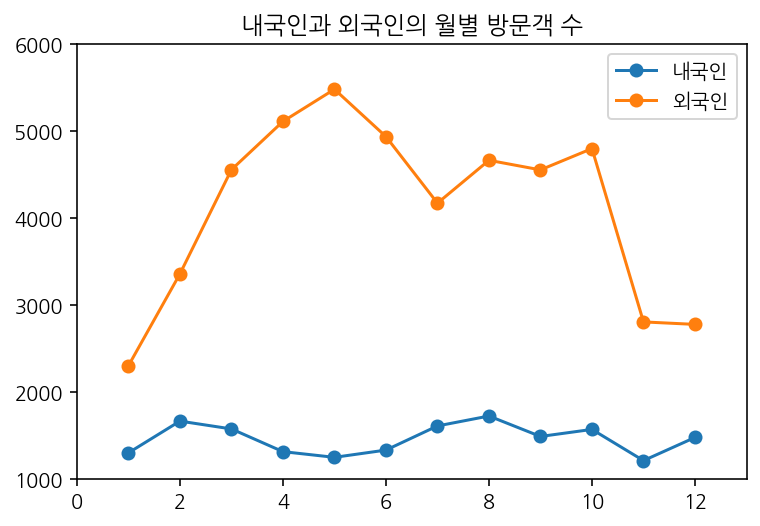

In [253]:
plt.title("내국인과 외국인의 월별 방문객 수")
month= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
prt = prt_all["total"]
nprt = nprt_all["total"]

plt.plot(month, prt,  marker="o")
plt.plot(month, nprt, marker="o")


plt.legend(['내국인', '외국인'])
plt.xlim(0,13)
plt.ylim(1000,6000)
plt.show()

#### 가설 8 결론 : 성수기 보다는 겨울철의 취소율이 비교적 낮았다.
 - 봄, 가을이 고객이 가장 많고, 취소율도 높다.
 - 겨름철이 비교적 사람이 적고 취소율도 낮다.

#### 가설 9: 포르투갈 국적의 고객 취소율은 높을 것이다. 즉, 인접 국가일수록 취소율이 높을 것이다.

In [254]:
# 실제 방문한 고객의 국가
country =df.loc[(df["is_canceled"] == 0)]["country"].value_counts()
country

PRT    21398
GBR     9668
FRA     8468
ESP     6383
DEU     6067
       ...  
MLI        1
NAM        1
BDI        1
NPL        1
MDG        1
Name: country, Length: 165, dtype: int64

In [255]:
# 데이터 프레임으로 만들기
country=pd.DataFrame(country)
country.tail()

country
MLI        1
NAM        1
BDI        1
NPL        1
MDG        1

In [256]:
# 전체 country의 합을 구함
sum_country=sum(country["country"])

In [257]:
sum_country

75011

In [258]:
# 국가별 비율을 구함
per_country=country["country"] / sum_country * 100

In [259]:
# per_country데이터의 인덱스를 list 변환
ls_per_country_idx = list(per_country.index)

In [260]:
# 반올림해서 2째자리 까지 보여줌
per_country=round(per_country, 2)

In [261]:
# $pip install plotly - px.pie 그리기 위한 설치 코드
import plotly.express as px

In [262]:
# 실제 방문한 고객의 국가별 비율
plot = px.pie(country,
             values=country,
             names=ls_per_country_idx,
             title="방문객의 국적 비율",
             template="seaborn")

plot.update_traces(textposition="inside", textinfo="label+percent")
plot.show()

# 방문객 중 포르투갈인이 28.%로 가장 높았으며, 영국(12.9%), 프랑스(11.3%), 스페인(8.5%)이 그 뒤를 이음

#### 방문객 국적별 취소율 확인

In [263]:
# 월별, 방문객 국적별 호텔 취소율 확인
mth_cl_ct = df.pivot_table(["is_canceled"], ["country"], ["arrival_date_month"], aggfunc=np.sum, margins=True)
mth_cl_ct.tail(2)

is_canceled                                          \
arrival_date_month           1       2       3       4       5       6   
country                                                                  
ZWE                        NaN     0.0     NaN     NaN     NaN     NaN   
All                     1806.0  2693.0  3148.0  4518.0  4677.0  4534.0   

                                                                           
arrival_date_month       7       8       9      10      11      12    All  
country                                                                    
ZWE                    NaN     2.0     NaN     NaN     0.0     NaN      2  
All                 4737.0  5237.0  4115.0  4246.0  2120.0  2368.0  44199

In [264]:
# NaN 값 0으로 대체
mth_cl_ct["is_canceled"].fillna(0, inplace=True)
mth_cl_ct.tail(2)

is_canceled                                          \
arrival_date_month           1       2       3       4       5       6   
country                                                                  
ZWE                        NaN     0.0     NaN     NaN     NaN     NaN   
All                     1806.0  2693.0  3148.0  4518.0  4677.0  4534.0   

                                                                           
arrival_date_month       7       8       9      10      11      12    All  
country                                                                    
ZWE                    NaN     2.0     NaN     NaN     0.0     NaN      2  
All                 4737.0  5237.0  4115.0  4246.0  2120.0  2368.0  44199

In [265]:
mth_cl_ct.loc["PRT"]

             arrival_date_month
is_canceled  1                      1062.0
             2                      1721.0
             3                      1855.0
             4                      2571.0
             5                      2847.0
             6                      2906.0
             7                      2630.0
             8                      2812.0
             9                      3158.0
             10                     3045.0
             11                     1505.0
             12                     1451.0
             All                   27563.0
Name: PRT, dtype: float64

In [266]:
#전체 국가 데이터 - is_canceled가 0과 1로 구분하여 보여줌
cn=df.groupby(["country", "is_canceled"]).size().reset_index(name="counts")
cn

country  is_canceled  counts
0       ABW            0       2
1       AGO            0     157
2       AGO            1     205
3       AIA            0       1
4       ALB            0      10
..      ...          ...     ...
287     ZAF            1      31
288     ZMB            0       1
289     ZMB            1       1
290     ZWE            0       2
291     ZWE            1       2

[292 rows x 3 columns]

In [267]:
# 국가별 총 데이터 수 - 위의 is_canceled의 0과1을 합친 하나의 데이터프레임
cn2=df.groupby(["country"]).size().reset_index(name="counts")
cn2

country  counts
0       ABW       2
1       AGO     362
2       AIA       1
3       ALB      12
4       AND       7
..      ...     ...
172     VGB       1
173     VNM       8
174     ZAF      80
175     ZMB       2
176     ZWE       4

[177 rows x 2 columns]

In [268]:
# 취소한 국가 선택
cn_can = cn.loc[(cn["is_canceled"] == 1)]

In [269]:
# 취소한 국가와 총 국가의 데이터(cn2) 합치기
all_cn=pd.merge(cn_can, cn2, on="country", how="outer" )
all_cn

country  is_canceled  counts_x  counts_y
0       AGO          1.0     205.0       362
1       ALB          1.0       2.0        12
2       AND          1.0       5.0         7
3       ARE          1.0      43.0        51
4       ARG          1.0      54.0       214
..      ...          ...       ...       ...
172     STP          NaN       NaN         2
173     SUR          NaN       NaN         5
174     SYR          NaN       NaN         3
175     TGO          NaN       NaN         2
176     UGA          NaN       NaN         2

[177 rows x 4 columns]

In [270]:
# 국가별 취소 비율 계산해서 per 컬럼에 추가
all_cn["per"] = all_cn["counts_x"] / all_cn["counts_y"] * 100
all_cn

country  is_canceled  counts_x  counts_y        per
0       AGO          1.0     205.0       362  56.629834
1       ALB          1.0       2.0        12  16.666667
2       AND          1.0       5.0         7  71.428571
3       ARE          1.0      43.0        51  84.313725
4       ARG          1.0      54.0       214  25.233645
..      ...          ...       ...       ...        ...
172     STP          NaN       NaN         2        NaN
173     SUR          NaN       NaN         5        NaN
174     SYR          NaN       NaN         3        NaN
175     TGO          NaN       NaN         2        NaN
176     UGA          NaN       NaN         2        NaN

[177 rows x 5 columns]

In [271]:
all_cn1 = all_cn[(all_cn.country == "PRT") | (all_cn.country == "FRA") | (all_cn.country == "GBR") | (all_cn.country == "ESP") | (all_cn.country == "DEU")]
all_cn1.sort_values("per", ascending = False)

country  is_canceled  counts_x  counts_y        per
97     PRT          1.0   27563.0     48961  56.295827
33     ESP          1.0    2177.0      8560  25.432243
41     GBR          1.0    2452.0     12120  20.231023
38     FRA          1.0    1933.0     10401  18.584751
27     DEU          1.0    1218.0      7285  16.719286

#### 총 취소에서 포르투갈과 그 이외의 국가가 차지하는 비율

In [272]:
mth = df.groupby(["arrival_date_month", "country"]).sum()["is_canceled"].reset_index()
mth.tail()

arrival_date_month country  is_canceled
1162                  12     TWN            1
1163                  12     UKR            5
1164                  12     USA           24
1165                  12     VEN            2
1166                  12     ZAF            1

In [273]:
# 포르투갈인(내국인)의 월별  취소현황
PRT = mth[(mth["country"]=="PRT")].reset_index(drop=True)
PRT = PRT.rename(columns={"is_canceled":"PRT_canceled"})
PRT

arrival_date_month country  PRT_canceled
0                    1     PRT          1062
1                    2     PRT          1721
2                    3     PRT          1855
3                    4     PRT          2571
4                    5     PRT          2847
5                    6     PRT          2906
6                    7     PRT          2630
7                    8     PRT          2812
8                    9     PRT          3158
9                   10     PRT          3045
10                  11     PRT          1505
11                  12     PRT          1451

In [274]:
# 외국인의 월별 취소현황
N_PRT = mth[(mth["country"]!="PRT")].reset_index(drop=True)
N_PRT2 = N_PRT.groupby("arrival_date_month").sum()["is_canceled"].reset_index()
N_PRT2 = N_PRT2.rename(columns={"is_canceled":"NT_PRT_canceled"})
N_PRT2

arrival_date_month  NT_PRT_canceled
0                    1              744
1                    2              972
2                    3             1293
3                    4             1947
4                    5             1830
5                    6             1628
6                    7             2107
7                    8             2425
8                    9              957
9                   10             1201
10                  11              615
11                  12              917

In [275]:
PRT2 = pd.concat([PRT, N_PRT2], sort=True)
PRT2

NT_PRT_canceled  PRT_canceled  arrival_date_month country
0               NaN        1062.0                   1     PRT
1               NaN        1721.0                   2     PRT
2               NaN        1855.0                   3     PRT
3               NaN        2571.0                   4     PRT
4               NaN        2847.0                   5     PRT
5               NaN        2906.0                   6     PRT
6               NaN        2630.0                   7     PRT
7               NaN        2812.0                   8     PRT
8               NaN        3158.0                   9     PRT
9               NaN        3045.0                  10     PRT
10              NaN        1505.0                  11     PRT
11              NaN        1451.0                  12     PRT
0             744.0           NaN                   1     NaN
1             972.0           NaN                   2     NaN
2            1293.0           NaN                   3     NaN
3            1947.0           NaN                   4     NaN
4            1830.0           NaN                   5     NaN
5            1628.0           NaN                   6     NaN
6            2107.0           NaN                   7     NaN
7            2425.0           NaN                   8     NaN
8             957.0           NaN                   9     NaN
9            1201.0           NaN                  10     NaN
10            615.0           NaN                  11     NaN
11            917.0           NaN                  12     NaN

In [276]:
PRT3 = PRT2.groupby("arrival_date_month").sum()["PRT_canceled"].reset_index()
PRT3

arrival_date_month  PRT_canceled
0                    1        1062.0
1                    2        1721.0
2                    3        1855.0
3                    4        2571.0
4                    5        2847.0
5                    6        2906.0
6                    7        2630.0
7                    8        2812.0
8                    9        3158.0
9                   10        3045.0
10                  11        1505.0
11                  12        1451.0

In [277]:
PRT4 = PRT2.groupby("arrival_date_month").sum()["NT_PRT_canceled"].reset_index()
PRT4

arrival_date_month  NT_PRT_canceled
0                    1            744.0
1                    2            972.0
2                    3           1293.0
3                    4           1947.0
4                    5           1830.0
5                    6           1628.0
6                    7           2107.0
7                    8           2425.0
8                    9            957.0
9                   10           1201.0
10                  11            615.0
11                  12            917.0

In [278]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [279]:
mpl.rc('font', family='NanumGothic')
mpl.rc('axes', unicode_minus=False)

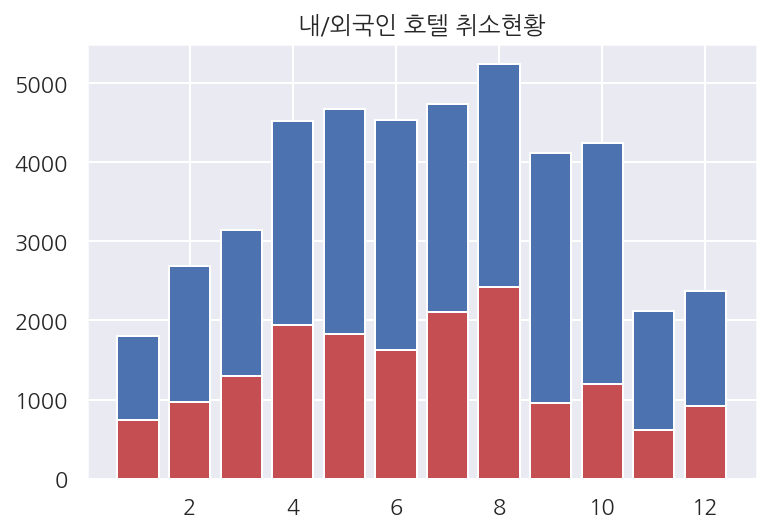

In [280]:
x1=PRT3["arrival_date_month"]
y1=PRT3["PRT_canceled"]

x2=PRT4["arrival_date_month"]
y2=PRT4["NT_PRT_canceled"]

plt.title("내/외국인 호텔 취소현황")
p1 = plt.bar(x1, y1, bottom=y2)
p2 = plt.bar(x2, y2, color='r')
plt.show()

# 외국인보다 내국인(포르투갈인)의 호텔 취소율이 높았음
# 특히, 9, 10월에 포르투갈인이 외국인에 비해 2배 이상 높은 반면, 4~8월에는 외국인의 취소율이 훨씬 높게 나타남

#### 가설 9 결론 : 포르투갈 국적의 고객이 취소율에 미치는 영향이 크다.
 - 고객 중 차지하는 비중도 높고, 취소율도 높다.

### 4. 예측모델 비교
    (1) 로지스틱 회귀분석
    (2) DecisionTree

#### (1) 로지스틱 회귀분석

In [281]:
import pickle
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [282]:
# 독립변수, 종속변수 설정
x = df2.drop(["is_canceled"], axis =1 )
y = df2["is_canceled"]

In [283]:
# 학습 데이터, 테스트 데이터 설정
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [284]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [285]:
# 로지스틱회귀분석모델
model = LogisticRegression(solver = "liblinear")
model.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [286]:
print(model.score(train_x, train_y)) # 학습데이터 정확도

0.8081057437655038


In [287]:
print(model.score(test_x, test_y)) # 테스트데이터 정확도

0.8091043816234655


In [288]:
print(model.coef_) #독립변수별 계수, 독립변수가 종속변수에 미치는 영향도

[[ 5.26985813e-01  2.32447894e-01  2.73273864e-01 -1.78180288e-01
   1.00299413e-03  8.70143305e-02  1.40533457e-01  1.04720611e-01
   9.52132498e-02  5.78214330e-03 -1.72133431e-01  1.89309183e+00
  -6.30924423e-01 -2.35757375e-01 -4.20678651e-02  1.28812283e-01
  -6.01983482e-01  7.43960864e-02 -7.43960864e-02 -1.17257562e-02
  -3.36577596e-02 -1.20392029e-01 -2.22245431e-01 -5.73918190e-02
  -2.64464539e-01  4.49112545e-01  3.59492423e-02 -7.98277597e-01
   8.10803073e-01 -8.01606793e-02 -8.73175924e-02 -4.51272928e-02
   1.31750045e-01 -9.34964838e-02 -3.54470709e-02  7.31386072e-02
  -2.98643006e-02 -3.30278783e-03  8.68974384e-03  4.22571870e-02
  -2.20937112e-02 -3.21798647e-03 -2.67423458e-02 -2.53988235e-02
  -3.07747535e-02 -4.64299233e-02 -9.71660844e-02  7.01996760e-03
  -1.70173122e-02 -1.24056762e-01  4.75468325e-02  0.00000000e+00
   9.87735284e-03 -2.51294633e-02  1.31236347e-02 -2.22842151e-02
  -3.21428361e-03  2.34509071e-03 -6.27773335e-02  1.38758911e-02
  -2.94886

In [289]:
import statsmodels.api as sm

In [290]:
x2 = sm.add_constant(x)
model = sm.OLS(y,  x2)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            is_canceled   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.408
Method:                 Least Squares   F-statistic:                     361.8
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        17:03:59   Log-Likelihood:                -51006.
No. Observations:              119210   AIC:                         1.025e+05
Df Residuals:                  118981   BIC:                         1.047e+05
Df Model:                         228                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### (2) DecisionTree

In [291]:
from sklearn.tree import DecisionTreeClassifier

In [292]:
decision_tree = DecisionTreeClassifier(random_state=1) 
decision_tree.fit(train_x, train_y)
pred_y = decision_tree.predict(test_x)  
acc_decision_tree = round(decision_tree.score(test_x, test_y) * 100, 2)
acc_decision_tree

83.93

In [293]:
pred_y = decision_tree.predict(test_x)

In [294]:
y = np.array(test_y)

In [295]:
len(y[y == pred_y]) / len(pred_y)

0.8393031904482287

In [296]:
decision_tree.score(test_x, test_y)

0.8393031904482287